<a href="https://www.kaggle.com/code/thirumani/shark-tank-us-data-analysis?scriptVersionId=233406664" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## <p style="background-color:#800080;color:white;font-size:24px;text-align:center;border-radius:10px 10px;font-weight:bold;border:2px solid #800080;">🇺🇸 SharkTank US Exploratory Data Analysis (EDA) 🦈</p>
## Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-us-dataset

In [1]:
from IPython.display import IFrame
import datetime
print("Notebook was last executed on:", datetime.date.today().strftime("%Y-%b-%d"), "with Python version")
!python --version

Notebook was last executed on: 2025-Apr-12 with Python version
Python 3.11.11


In [2]:
# Source: Wikipedia
IFrame('https://upload.wikimedia.org/wikipedia/en/1/18/Shark_Tank_%28ABC_Network_reality_series%29_logo.svg', width=350, height=270)

## ⚒️ Importing Required Python Libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 50)

import matplotlib.pyplot as plt
import seaborn as sns
from babel.numbers import format_currency
from wordcloud import WordCloud, STOPWORDS
import geopandas as gpd
import plotly.express as px
import plotly.io as pio
pio.templates.default = "plotly_dark"
pio.renderers.default = 'notebook'

## ⏳ Check and import dataset

In [4]:
! ls -l /kaggle/input/shark-tank-us-dataset
shark_tank = pd.read_csv('/kaggle/input/shark-tank-us-dataset/Shark Tank US dataset.csv', encoding = "ISO-8859-1")

nRow, nCol = shark_tank.shape
print(f'\nThere are {nRow} rows and {nCol} columns in the dataset')

total 320
-rw-r--r-- 1 nobody nogroup 327572 Apr 12 06:15 'Shark Tank US dataset.csv'

There are 1425 rows and 53 columns in the dataset


## 💵 Exploratory Data Analysis (EDA)

In [5]:
shark_tank.head(5)

Season Number              Startup Name  Episode Number  Pitch Number  \
0              1            AvaTheElephant               1             1   
1              1         MrTod'sPieFactory               1             2   
2              1                   Wispots               1             3   
3              1  CollegeFoxesPackingBoxes               1             4   
4              1                  IonicEar               1             5   

  Season Start Season End Original Air Date             Industry  \
0     9-Aug-09   5-Feb-10          9-Aug-09      Health/Wellness   
1     9-Aug-09   5-Feb-10          9-Aug-09    Food and Beverage   
2     9-Aug-09   5-Feb-10          9-Aug-09    Business Services   
3     9-Aug-09   5-Feb-10          9-Aug-09       Lifestyle/Home   
4     9-Aug-09   5-Feb-10          9-Aug-09  Technology/Software   

                              Business Description  \
0           Ava The Elephant - Baby and Child Care   
1           Mr. Tod's Pie Factory - Specialty Food   
2                      Wispots - Consumer Services   
3  College Foxes Packing Boxes - Consumer Services   
4                            Ionic Ear - Novelties   

                       Company Website Pitchers Gender Pitchers Average Age  \
0       http://www.avatheelephant.com/          Female                  NaN   
1                  http://whybake.com/            Male                  NaN   
2              http://www.wispots.com/            Male                  NaN   
3  http://collegehunkshaulingjunk.com/            Male                  NaN   
4                                  NaN            Male                  NaN   

  Pitchers City Pitchers State           Entrepreneur Names  \
0       Atlanta             GA              Tiffany Krumins   
1      Somerset             NJ                   Tod Wilson   
2          Cary             NC               Kevin Flannery   
3         Tampa             FL  Nick Friedman, Omar Soliman   
4      St. Paul             MN               Darrin Johnson   

   Multiple Entrepreneurs  US Viewership  Original Ask Amount  \
0                     0.0           4.15              50000.0   
1                     0.0           4.15             460000.0   
2                     0.0           4.15            1200000.0   
3                     0.0           4.15             250000.0   
4                     0.0           4.15            1000000.0   

   Original Offered Equity  Valuation Requested  Got Deal  Total Deal Amount  \
0                     15.0             333333.0       1.0            50000.0   
1                     10.0            4600000.0       1.0           460000.0   
2                     10.0           12000000.0       0.0                NaN   
3                     25.0            1000000.0       0.0                NaN   
4                     15.0            6666667.0       0.0                NaN   

   Total Deal Equity  Deal Valuation  Number of Sharks in Deal  ...  \
0               55.0         90909.0                       1.0  ...   
1               50.0        920000.0                       2.0  ...   
2                NaN             NaN                       NaN  ...   
3                NaN             NaN                       NaN  ...   
4                NaN             NaN                       NaN  ...   

   Advisory Shares Equity  Loan Deal Has Conditions  \
0                     NaN   NaN                 NaN   
1                     NaN   NaN                 NaN   
2                     NaN   NaN                 NaN   
3                     NaN   NaN                 NaN   
4                     NaN   NaN                 NaN   

   Barbara Corcoran Investment Amount  Barbara Corcoran Investment Equity  \
0                             50000.0                                55.0   
1                            230000.0                                25.0   
2                                 NaN                                 NaN   
3                   

In [6]:
shark_tank.tail(10).T

1415  \
Season Number                                                16   
Startup Name                                       BAMBuckwheat   
Episode Number                                               14   
Pitch Number                                               1416   
Season Start                                          18-Oct-24   
Season End                                                  NaN   
Original Air Date                                     21-Mar-25   
Industry                                      Food and Beverage   
Business Description                Eco-friendly buckwheat milk   
Company Website                        https://bamisbetter.com/   
Pitchers Gender                                          Female   
Pitchers Average Age                                     Middle   
Pitchers City                                         Encinitas   
Pitchers State                                               CA   
Entrepreneur Names                                 Paige Hansen   
Multiple Entrepreneurs                                      0.0   
US Viewership                                              2.79   
Original Ask Amount                                    250000.0   
Original Offered Equity                                    10.0   
Valuation Requested                                   2500000.0   
Got Deal                                                    0.0   
Total Deal Amount                                           NaN   
Total Deal Equity                                           NaN   
Deal Valuation                                              NaN   
Number of Sharks in Deal                                    NaN   
Investment Amount Per Shark                                 NaN   
Equity Per Shark                                            NaN   
Royalty Deal                                                NaN   
Advisory Shares Equity                                      NaN   
Loan                                                        NaN   
Deal Has Conditions                                         NaN   
Barbara Corcoran Investment Amount                          NaN   
Barbara Corcoran Investment Equity                          NaN   
Mark Cuban Investment Amount                                NaN   
Mark Cuban Investment Equity                                NaN   
Lori Greiner Investment Amount                              NaN   
Lori Greiner Investment Equity                              NaN   
Robert Herjavec Investment Amount                           NaN   
Robert Herjavec Investment Equity                           NaN   
Daymond John Investment Amount                              NaN   
Daymond John Investment Equity                              NaN   
Kevin O Leary Investment Amount                             NaN   
Kevin O Leary Investment Equity                             NaN   
Guest Investment Amount                                     NaN   
Guest Investment Equity                                     NaN   
Guest Name                                                  NaN   
Barbara Corcoran Present                                    NaN   
Mark Cuban Present                                          1.0   
Lori Greiner Present                                        1.0   
Robert Herjavec Present                                     NaN   
Daymond John Present                                        1.0   
Kevin O Leary Present                                       1.0   
Guest Present                                               1.0   

                                                                      1416  \
Season Number                                                           16   
Startup Name                                                  DuzterHockey   
Episode Number                                                          14   
Pitch Number                                                          1417   
Season Start                                      

In [7]:
shark_tank['Season Number'] = shark_tank['Season Number'].astype(pd.Int32Dtype())
shark_tank['Episode Number'] = shark_tank['Episode Number'].astype(pd.Int32Dtype())
shark_tank['Pitch Number'] = shark_tank['Pitch Number'].astype(pd.Int32Dtype())

shark_tank['Startup Name'] = shark_tank['Startup Name'].astype(str)
shark_tank['Industry'] = shark_tank['Industry'].astype(str)
shark_tank['Business Description'] = shark_tank['Business Description'].astype(str)

shark_tank['Multiple Entrepreneurs'] = shark_tank['Multiple Entrepreneurs'].astype(pd.Int32Dtype())
shark_tank['Got Deal'] = shark_tank['Got Deal'].astype(pd.Int32Dtype())

In [8]:
shark_tank.sample(10).style.set_properties(**{"background-color": "#2a9d8f","color":"white","border": "1px solid black", 'font-size': '10pt'})

In [9]:
shark_tank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1425 entries, 0 to 1424
Data columns (total 53 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Season Number                       1425 non-null   Int32  
 1   Startup Name                        1425 non-null   object 
 2   Episode Number                      1425 non-null   Int32  
 3   Pitch Number                        1425 non-null   Int32  
 4   Season Start                        1425 non-null   object 
 5   Season End                          1361 non-null   object 
 6   Original Air Date                   1425 non-null   object 
 7   Industry                            1425 non-null   object 
 8   Business Description                1425 non-null   object 
 9   Company Website                     666 non-null    object 
 10  Pitchers Gender                     1418 non-null   object 
 11  Pitchers Average Age                489 non

In [10]:
shark_tank.describe().T.round(2).style.background_gradient(cmap = 'Oranges')

In [11]:
# Unique values in each column
for col in shark_tank.columns:
    print("Number of unique values in", col, "-", shark_tank[col].nunique())

Number of unique values in Season Number - 16
Number of unique values in Startup Name - 1422
Number of unique values in Episode Number - 29
Number of unique values in Pitch Number - 1425
Number of unique values in Season Start - 16
Number of unique values in Season End - 15
Number of unique values in Original Air Date - 344
Number of unique values in Industry - 17
Number of unique values in Business Description - 1420
Number of unique values in Company Website - 664
Number of unique values in Pitchers Gender - 3
Number of unique values in Pitchers Average Age - 3
Number of unique values in Pitchers City - 267
Number of unique values in Pitchers State - 47
Number of unique values in Entrepreneur Names - 921
Number of unique values in Multiple Entrepreneurs - 2
Number of unique values in US Viewership - 243
Number of unique values in Original Ask Amount - 79
Number of unique values in Original Offered Equity - 47
Number of unique values in Valuation Requested - 178
Number of unique value

In [12]:
# Latest/current season data
shark_tank_recent = shark_tank.loc[(shark_tank['Season Number']==16)]

In [13]:
# Data set information
print(shark_tank['Season Number'].max(), "total seasons in US SharkTank\n")
print(shark_tank['Pitch Number'].max(), "#startups came for pitching \n")

16 total seasons in US SharkTank

1425 #startups came for pitching 



Season Number   1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
Episode Number  14   9  15  26  29  29  29  24  24  23  24  25  24  22  22  16


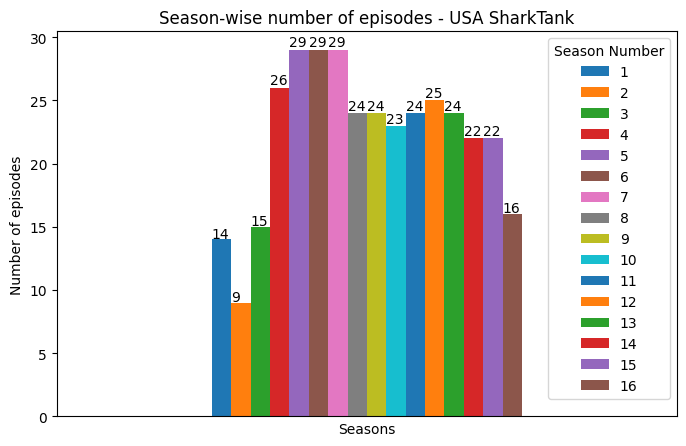

In [14]:
# Season-wise number of episodes
tmp = pd.pivot_table(shark_tank, values='Episode Number', columns='Season Number', aggfunc='max')
print(tmp)
ax = tmp.plot.bar(figsize=(8,5), title="Season-wise number of episodes - USA SharkTank")
plt.xlabel("Seasons")
plt.ylabel("Number of episodes")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [15]:
# Season-wise number of pitches
tmp = shark_tank['Season Number'].value_counts().sort_values()
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank US - Season-wise number of pitches</b>", template='plotly_white', text=tmp, width=490, height=640)
fig.update_yaxes(tickvals=list(range(17)))
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [16]:
# There were 3 to 5 pitches, in a each episode
print(shark_tank[['Season Number','Episode Number']].value_counts().sort_values(ascending=True).unique())

[3 4 5]


In [17]:
# Types of industries, came for investments, in all seasons
tmp = shark_tank['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> Shark Tank USA - Industry wise startups (in all seasons)</b>", template='simple_white', text=tmp, width=850, height=700)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [18]:
# Types of industries, came for investment, in current/latest season (16th season)
tmp = shark_tank_recent['Industry'].value_counts().sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b> US Shark Tank in 16th season - Industry wise startups</b>", template='simple_white', text=tmp, width=620, height=650)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [19]:
# All seasons averages
pivot = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount','Valuation Requested','Deal Valuation','Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False)
pivot.style.format('{:.0f}')

# Amount & Valuation is in USD and equity in %

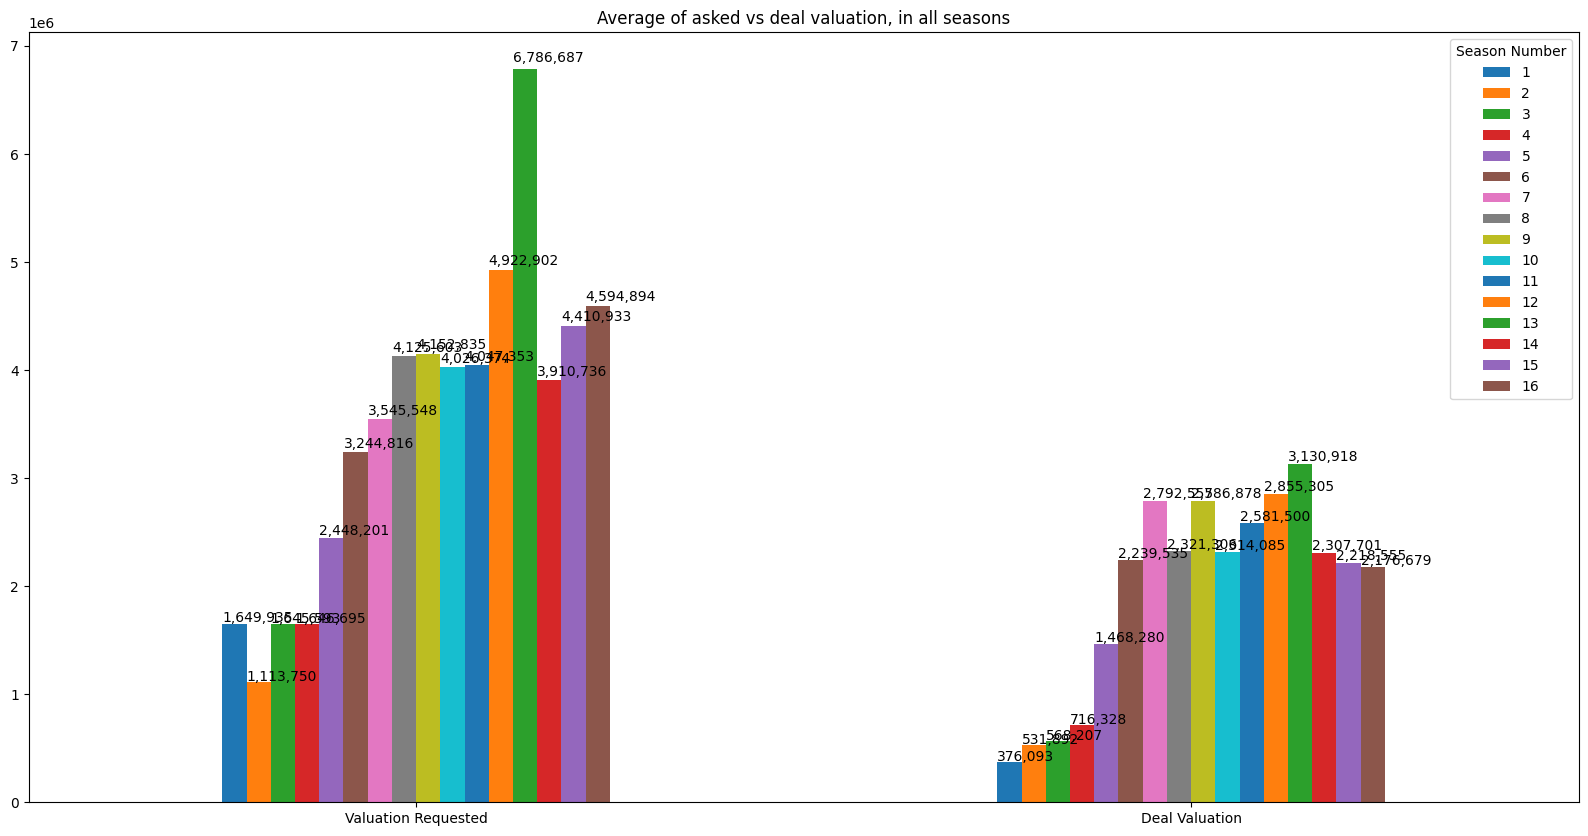

In [20]:
# All seasons average of offered/deal valuation
ax = pd.pivot_table(shark_tank, values=['Valuation Requested','Deal Valuation'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(20,10), title="Average of asked vs deal valuation, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

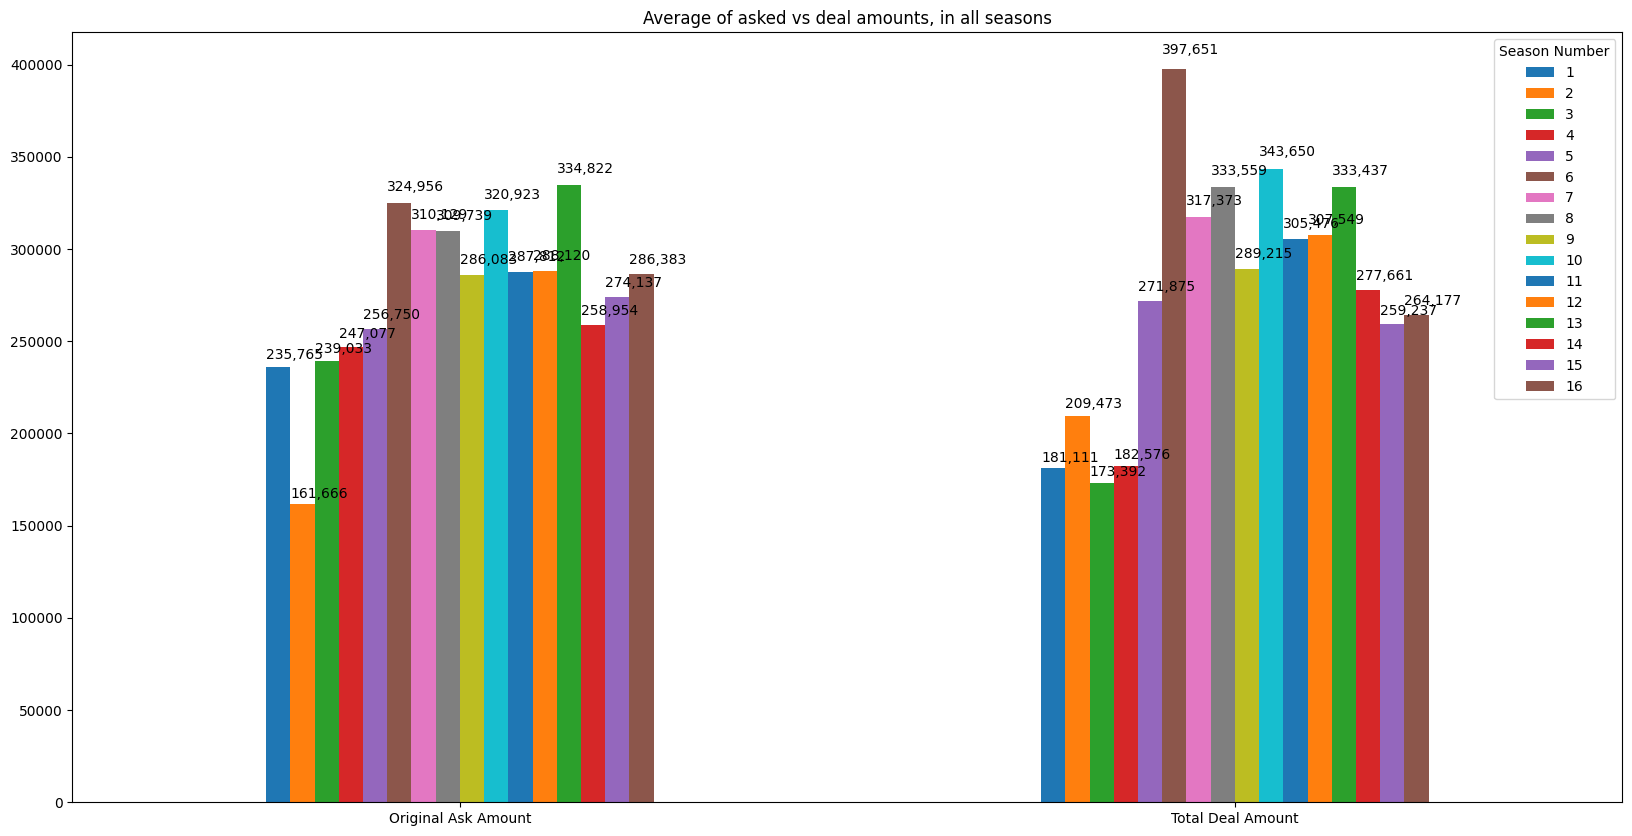

In [21]:
# All seasons average of offered/deal amounts
ax = pd.pivot_table(shark_tank, values=['Original Ask Amount','Total Deal Amount'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(20,10), title="Average of asked vs deal amounts, in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02))

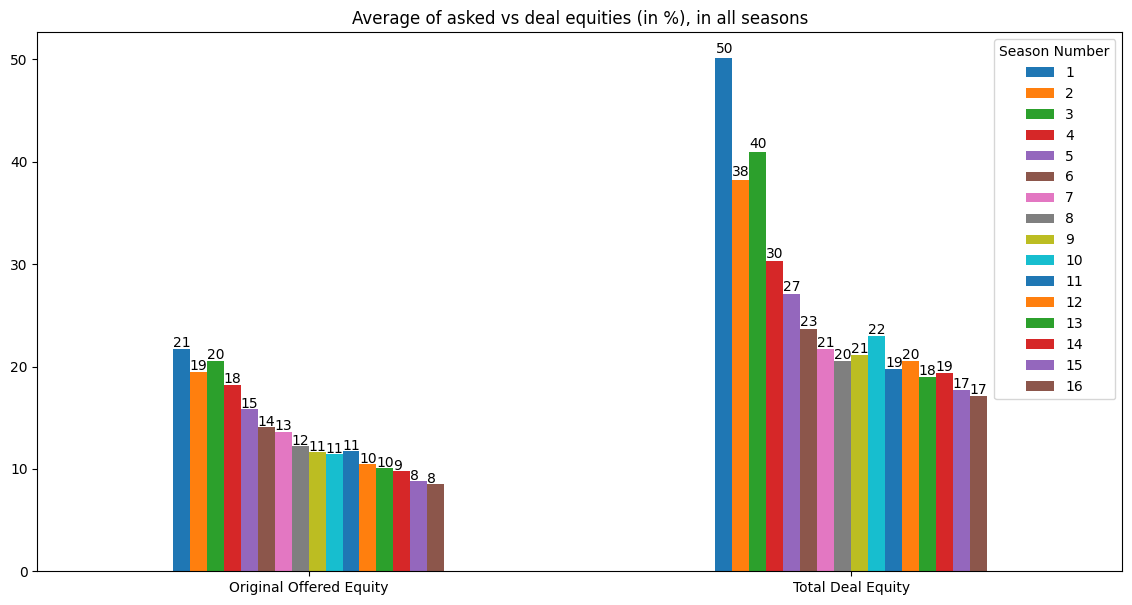

In [22]:
# All seasons average of offered/deal equities
ax = pd.pivot_table(shark_tank, values=['Original Offered Equity','Total Deal Equity'], columns='Season Number', aggfunc=np.mean, sort=False).plot.bar(figsize=(14,7), title="Average of asked vs deal equities (in %), in all seasons")
plt.xticks(rotation='horizontal')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

Pitchers Gender
Male          769
Female        379
Mixed Team    270
Name: count, dtype: int64 

Pitchers Gender
Male          54%
Female        27%
Mixed Team    19%
Name: proportion, dtype: object 



Text(0, 0.5, '')

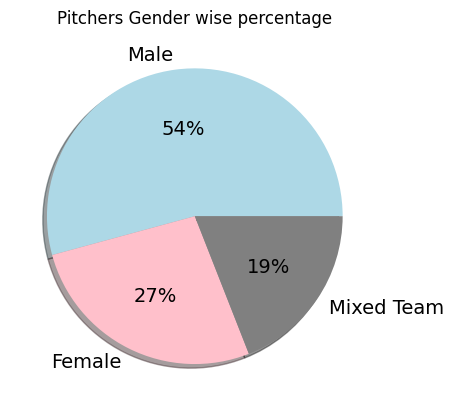

In [23]:
# Gender wise
print(shark_tank['Pitchers Gender'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Gender'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Gender wise percentage")
shark_tank["Pitchers Gender"].value_counts().plot(kind='pie', autopct='%.0f%%', colors=["lightblue", "pink", "gray"], shadow=True, fontsize=14)
plt.ylabel('')

Pitchers Average Age
Middle    439
Young      37
Old        13
Name: count, dtype: int64 

Pitchers Average Age
Middle    90%
Young      8%
Old        3%
Name: proportion, dtype: object 



Text(0, 0.5, '')

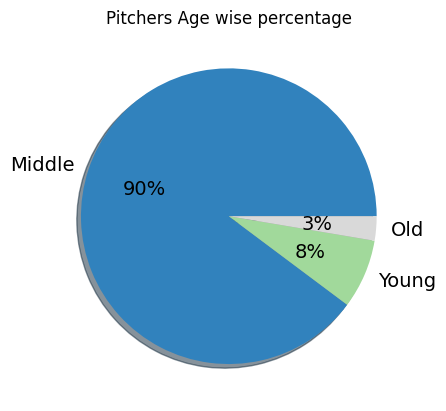

In [24]:
# Age wise
print(shark_tank['Pitchers Average Age'].value_counts(),"\n")

# In percentage
print(round(shark_tank['Pitchers Average Age'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False),"\n")

plt.title("Pitchers Age wise percentage")
shark_tank["Pitchers Average Age"].value_counts().plot(kind='pie', autopct='%.0f%%', cmap='tab20c', shadow=True, fontsize=14)
plt.ylabel('')

### 💹 61% companies received offers and 39% startups could not convince Sharks to invest

Got Deal
1    869
0    552
Name: count, dtype: Int64 

Got Deal
1    61%
0    39%
Name: proportion, dtype: object


Text(0, 0.5, '')

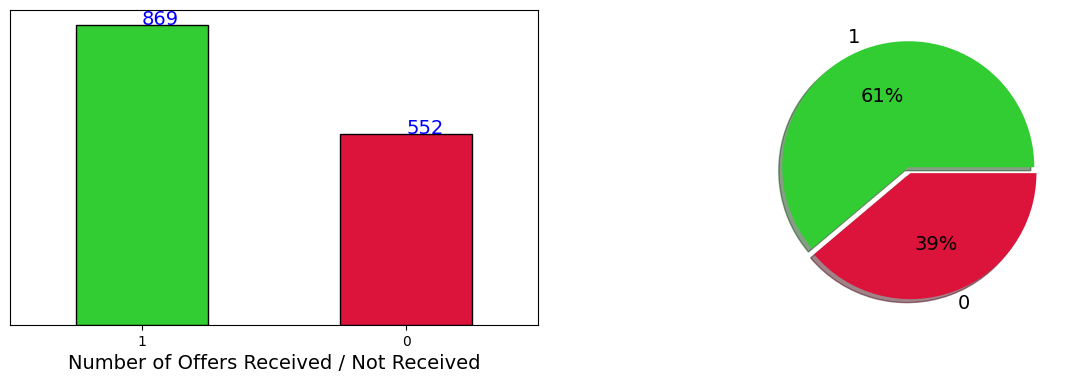

In [25]:
# Offers received
print(shark_tank['Got Deal'].value_counts(), "\n")
print(round(shark_tank['Got Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Got Deal"].value_counts().plot(kind='bar', color=["limegreen","crimson"], ec="k")
plt.xlabel("Number of Offers Received / Not Received", size=14)
plt.yticks([])
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Got Deal"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="blue")

ax2 = plt.subplot(222)
shark_tank["Got Deal"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["limegreen","crimson"], shadow=True, fontsize=14)
plt.ylabel('')

# 869 companies received offers & 552 startups could not convince #Sharks to invest.

Pitchers Gender
Male          444
Female        240
Mixed Team    180
Name: count, dtype: int64


Text(0, 0.5, '')

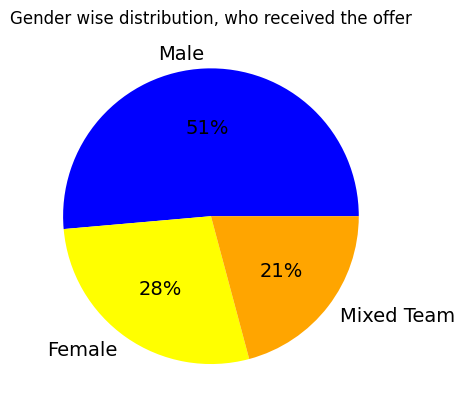

In [26]:
# Gender wise distribution, who received the offer
print(shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts())
plt.title("Gender wise distribution, who received the offer")
shark_tank[shark_tank['Got Deal']==1]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%',colors=["blue", "yellow", "orange"], fontsize=14)
plt.ylabel('')

Pitchers Gender
Male          323
Female        137
Mixed Team     90
Name: count, dtype: int64


Text(0, 0.5, '')

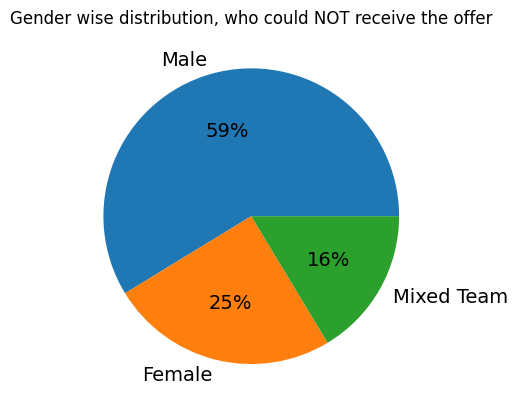

In [27]:
# Gender wise distribution, who could NOT receive the offer
print(shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts())
plt.title("Gender wise distribution, who could NOT receive the offer")
shark_tank[shark_tank['Got Deal']==0]['Pitchers Gender'].value_counts().sort_values(ascending=False).plot.pie(autopct='%.0f%%', fontsize=14)
plt.ylabel('')

## ❗ USA Shark Tank dataset Visualizations/infographics in Tableau Public —
### https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1

In [28]:
IFrame("https://public.tableau.com/views/SharkTankUS/SharkTankUSStory_1", width=1100, height=1100)

In [29]:
# Maximum amount requested
print("Maximum amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].max(), 'USD', locale='en_US').replace(".00", ""))

Maximum amount requested, by a pitcher - $5,000,000


In [30]:
# Least amount requested
print("Least amount requested, by a pitcher -", format_currency(shark_tank['Original Ask Amount'].min(), 'USD', locale='en_US').replace(".00", ""))

Least amount requested, by a pitcher - $10,000


In [31]:
# Sum of investment amount asked, in Shark Tank America
print("Sum of investment amount asked, by all startup companies, in US Shark Tank -", format_currency(shark_tank['Original Ask Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of investment amount asked, by all startup companies, in US Shark Tank - $403,024,000


In [32]:
# Amount invested by all sharks, in US SharkTank
print("Amount invested by all sharks, in Shark Tank US -", format_currency(shark_tank['Total Deal Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))

Amount invested by all sharks, in Shark Tank US - $253,671,166


In [33]:
# Sum of loan/debt amount, in American Shark Tank
print("Sum of loan/debt amount, given by all sharks, in American SharkTank -", format_currency(shark_tank['Loan'].sum(), 'USD', locale='en_US').replace(".00", ""))

Sum of loan/debt amount, given by all sharks, in American SharkTank - $24,712,500


In [34]:
# Top 15 investments, as per total investment/deal amount
print(shark_tank.groupby('Startup Name')['Total Deal Amount'].max().nlargest(15))

shark_tank['Total Deal Amount in Millions'] = shark_tank['Total Deal Amount']/1000000
tmpdf = shark_tank.sort_values('Total Deal Amount in Millions', ascending=False)[0:15]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Amount in Millions', color="Startup Name", title="Highest investment as per deal amount (in millions)", text=tmpdf['Total Deal Amount in Millions'].map(float).map(str))
fig.show(renderer="iframe")

Startup Name
AirCar                     5000000.0
MokiDoorstep               3000000.0
SynDaverLabs               3000000.0
Zipz                       2500000.0
DBestProducts              2350000.0
Fizzics                    2000000.0
TenThirtyOneProductions    2000000.0
Vengo                      2000000.0
RuggedManiac               1750000.0
BeyondSushi                1500000.0
RoboBurger                 1500000.0
Sworkit                    1500000.0
XCraft                     1500000.0
Trunkster                  1400000.0
HyConn                     1250000.0
Name: Total Deal Amount, dtype: float64


In [35]:
# Top 20 investments, as per total equity/shares percentage diluted
print(shark_tank.groupby('Startup Name')['Total Deal Equity'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Total Deal Equity', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Highest investment as per equity percentage", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

# 9 startups sold entire company (equity) to Sharks

Startup Name
ClassroomJams           100.0
CoolWraps               100.0
Evrewares               100.0
Hugo'sAmazingTape       100.0
HyConn                  100.0
MokiDoorstep            100.0
RokBlok                 100.0
TurboBaster             100.0
WineBalloon             100.0
LegacyShave              95.0
GrooveBook               80.0
RemyxxReKixxSneakers     80.0
Henry'sHumdingers        75.0
JeskaShoeCompany         70.0
Lightfilm                70.0
TheUROClub               70.0
ReaderestSpecsecure      65.0
TheLastLid               60.0
TreasureChestPets        60.0
CordaRoy's               58.0
Name: Total Deal Equity, dtype: float64


In [36]:
# Startups who sold (exactly) 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33.3][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] == 33.3][["Season Number","Startup Name", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] == 33.3]
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name    25
dtype: int64
      Season Number                 Startup Name  Total Deal Equity
551               7                       Shefit               33.3
584               7                        Trobo               33.3
591               7                  TheDripDrop               33.3
604               7  EVPExtremeVehicleProtection               33.3
626               8             AngelsandTomboys               33.3
633               8                  Sunscreeenr               33.3
667               8                       Kooler               33.3
695               8                      Goverre               33.3
697               8            BootyQueenApparel               33.3
702               8                PeoplesDesign               33.3
726               9                  HumanBobber               33.3
768               9              GoatPetProducts               33.3
829              10                     OatMeals               33.3
865             

In [37]:
# Startups who sold more than 1/3rd of their company (equity) to Sharks
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Startup Name"]].count())
print(shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ][["Season Number","Startup Name","Total Deal Amount", "Total Deal Equity"]])

tmpdf = shark_tank.loc[shark_tank['Total Deal Equity'] > 32 ].sort_values('Total Deal Equity', ascending=False)
fig = px.bar(tmpdf, x="Startup Name", y='Total Deal Equity', color="Startup Name", title="Startups who sold more than 1/3rd of their company", text=tmpdf['Total Deal Equity'].map(int).map(str) + "%")
fig.show(renderer="iframe")

Startup Name    181
dtype: int64
      Season Number       Startup Name  Total Deal Amount  Total Deal Equity
0                 1     AvaTheElephant            50000.0               55.0
1                 1  MrTod'sPieFactory           460000.0               50.0
5                 1       APerfectPear           500000.0               50.0
6                 1      ClassroomJams           250000.0              100.0
10                1        TurboBaster            35000.0              100.0
...             ...                ...                ...                ...
1319             15     MamaSingMySong           150000.0               33.3
1321             15    MeattheMushroom           150000.0               33.3
1322             15             AuBaby            80000.0               35.0
1355             15                 K3           100000.0               40.0
1399             16            Tabeeze           100000.0               33.3

[181 rows x 4 columns]


In [38]:
# Startups who got Debt/loan amount
print("Number of startups who got debt/loan amount", shark_tank['Loan'].count(),"\n")

shark_tank.loc[shark_tank['Loan'] >= 1][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity","Loan"]]

Number of startups who got debt/loan amount 58 



Season Number               Startup Name  Total Deal Amount  \
272               5           RapidRamenCooker           150000.0   
289               5                 BetterLife           400000.0   
291               5         PaparazziProposals           250000.0   
299               5                 Grace&Lace            87500.0   
300               5                       Yubo           150000.0   
433               6      Scratch&GrainBakingCo           150000.0   
459               6                   CocoJack           125000.0   
571               7                 BetterBack           750000.0   
580               7                      Vengo          2000000.0   
586               7                    Coolbox           500000.0   
621               8                     TekDry           500000.0   
622               8             NightRunner270           200000.0   
636               8                  StyleClub           500000.0   
640               8  Jack'sStands&Marketplaces            50000.0   
642               8                       Toor           500000.0   
647               8                    Inboard           750000.0   
651               8              SealedbySanta           150000.0   
670               8              DBestProducts          2350000.0   
684               8      BlendtiqueWineCompany           250000.0   
686               8                   Rareform           300000.0   
703               8                Wine&Design           500000.0   
733               9                   WaiveCar           500000.0   
753               9                 EverlyWell          1000000.0   
754               9                       Mush           300000.0   
759               9                    Frywall           100000.0   
791               9               GunnarOptiks           750000.0   
845              10           MakeupJunkieBags           200000.0   
899              11                BoostOxygen          1000000.0   
924              11                      Outer           750000.0   
931              11                 Flexscreen           400000.0   
955              11                     Bohana           200000.0   
956              11                       Boho           150000.0   
959              11                      Goumi          1000000.0   
974              11               MuralPainter           300000.0   
1023             12                    Electra           350000.0   
1027             12               SliceofSauce           200000.0   
1029             12                  LunaMagic           250000.0   
1031             12                     Quevos           200000.0   
1045             12               ByootCompany            50000.0   
1059             12                     NuMilk          1000000.0   
1062             12                 BunchBikes           250000.0   
1085             12                FloatNGrill           100000.0   
1121             13                 TheRealElf           125000.0   
1150             13                    Ade+Ayo           700000.0   
1170             13                 Browndages           100000.0   
1172             13                     Plunge          1200000.0   
1177             13                   Pricklee           200000.0   
1208             14                 Collars&Co          1000000.0   
1256             14                      Bleni           750000.0   
1257             14         TheIceCreamCanteen           100000.0   
1260             14                     Cincha           100000.0   
1264             14                  TiaLupita           500000.0   
1274             15            GatsbyChocolate           500000.0   
1327             15                  Splashzen           100000.0   
1341             15              NowhereBakery           100000.0   
1354             15                       HYPD           350000.0   
1356             15                 RoboBurger          1500000.0   
1383

In [39]:
# Top 20 investments, as per total debt/loan amount
print(shark_tank.groupby('Startup Name')['Loan'].max().nlargest(20))

tmpdf = shark_tank.sort_values('Loan', ascending=False)[0:20]
fig = px.bar(tmpdf, x="Startup Name", y='Loan', color="Startup Name", title="Highest Investment as per Debt amount", text=tmpdf['Loan'])
fig.show(renderer="iframe")

Startup Name
DBestProducts    2000000.0
Vengo            2000000.0
RoboBurger       1500000.0
Plunge           1200000.0
BoostOxygen      1000000.0
EverlyWell       1000000.0
Goumi            1000000.0
NuMilk           1000000.0
BetterBack        750000.0
GunnarOptiks      750000.0
Inboard           750000.0
Outer             750000.0
Collars&Co        700000.0
Ade+Ayo           500000.0
Bleni             500000.0
Coolbox           500000.0
StyleClub         500000.0
TekDry            500000.0
TiaLupita         500000.0
WaiveCar          500000.0
Name: Loan, dtype: float64


In [40]:
# Startups who gave Royalty
print("Number of startups who gave Royalty", shark_tank['Royalty Deal'].count(),"\n")

shark_tank.loc[shark_tank['Royalty Deal'] == "yes"][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who gave Royalty 85 



Season Number             Startup Name  Total Deal Amount  \
6                 1            ClassroomJams           250000.0   
10                1              TurboBaster            35000.0   
26                1              ElementBars           150000.0   
69                2  FirstDefenseNasalScreen           750000.0   
72                2          ModMomFurniture            90000.0   
...             ...                      ...                ...   
1372             16                 Yardsale           250000.0   
1378             16                Chalkless           400000.0   
1382             16                  Taverns           400000.0   
1394             16               Legit Kits           150000.0   
1401             16                  Bumpeez           100000.0   

      Total Deal Equity  
6                 100.0  
10                100.0  
26                 30.0  
69                 30.0  
72                 33.0  
...                 ...  
1372               10.0  
1378                4.0  
1382               15.0  
1394                5.0  
1401               15.0  

[85 rows x 4 columns]

Season Number  1   2   3   4   5   6   7   8   9   10  11  12  13  14  15  16
Royalty Deal    3   3   1   4   2   3   6   5   5   4  10   6  11  12   5   5


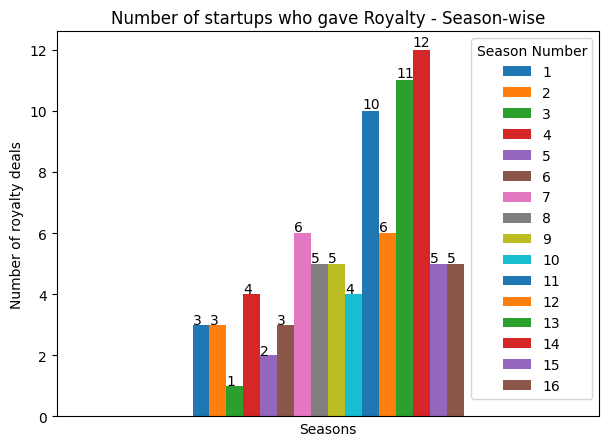

In [41]:
# Season-wise number of royalty deals
tmp = pd.pivot_table(shark_tank, values='Royalty Deal', columns='Season Number', aggfunc='count')
print(tmp)
ax = tmp.plot.bar(figsize=(7,5), title="Number of startups who gave Royalty - Season-wise")
plt.xlabel("Seasons")
plt.ylabel("Number of royalty deals")
plt.xticks([])
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.01))

In [42]:
# Startups who gave Advisory shares
print("Number of startups who gave Advisory shares/equity", shark_tank['Advisory Shares Equity'].count(),"\n")

shark_tank.loc[shark_tank['Advisory Shares Equity'] > 0][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity", "Advisory Shares Equity"]]

Number of startups who gave Advisory shares/equity 3 



Season Number Startup Name  Total Deal Amount  Total Deal Equity  \
1326             15        Flora           300000.0               15.0   
1348             15   Richaulist           150000.0               15.0   
1358             15         mosh           500000.0                3.5   

      Advisory Shares Equity  
1326                     5.0  
1348                     5.0  
1358                     1.5

In [43]:
# Deals with conditions
print("Number of startups who accepted conditional deals", shark_tank['Deal Has Conditions'].count(),"\n")

shark_tank.loc[shark_tank['Deal Has Conditions'] == 'yes'][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]]

Number of startups who accepted conditional deals 3 



Season Number Startup Name  Total Deal Amount  Total Deal Equity
1334             15   FilaManila           250000.0               20.0
1352             15      Blinger           200000.0               25.0
1378             16    Chalkless           400000.0                4.0

In [44]:
# Gender/age wise pitchers combination
shark_tank.groupby([shark_tank['Pitchers Gender'], shark_tank['Pitchers Average Age'], shark_tank['Multiple Entrepreneurs']]).size().nlargest(10)

# Groups/Couples in middle age is most frequent combination followed by Male/Female in middle age

Pitchers Gender  Pitchers Average Age  Multiple Entrepreneurs
Mixed Team       Middle                1                         110
Female           Middle                0                         101
Male             Middle                0                          98
                                       1                          96
Female           Middle                1                          29
                 Young                 0                          11
Male             Young                 0                           8
                                       1                           8
Mixed Team       Old                   1                           6
                 Young                 1                           5
dtype: int64

## 💰 Which shark invested most ?

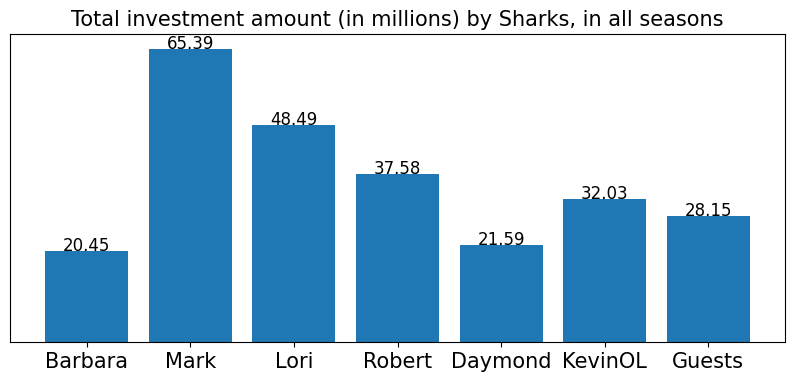

In [45]:
# Amount Invested by sharks, in all seasons
Amount = [(shark_tank['Barbara Corcoran Investment Amount']/1000000).sum(), (shark_tank['Mark Cuban Investment Amount']/1000000).sum(), (shark_tank['Lori Greiner Investment Amount']/1000000).sum(), (shark_tank['Robert Herjavec Investment Amount']/1000000).sum(),
    (shark_tank['Daymond John Investment Amount']/1000000).sum(), (shark_tank['Kevin O Leary Investment Amount']/1000000).sum(), (shark_tank['Guest Investment Amount']/1000000).sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'])
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total investment amount (in millions) by Sharks, in all seasons", fontsize=15)
plt.show()

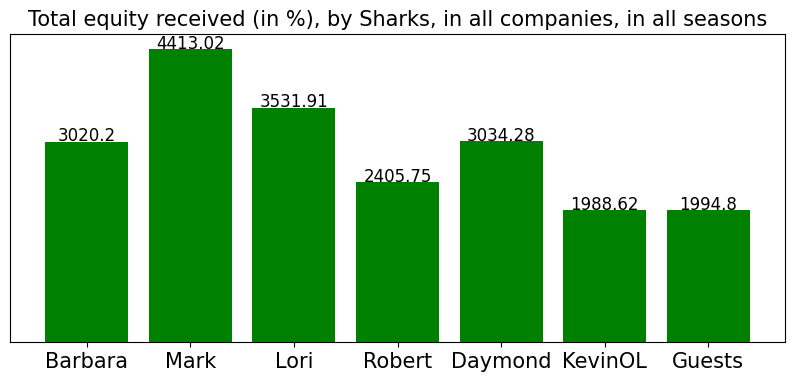

In [46]:
# Equity received by sharks, in all seasons
Equity = [shark_tank['Barbara Corcoran Investment Equity'].sum(), shark_tank['Mark Cuban Investment Equity'].sum(), shark_tank['Lori Greiner Investment Equity'].sum(), shark_tank['Robert Herjavec Investment Equity'].sum(),
    shark_tank['Daymond John Investment Equity'].sum(), shark_tank['Kevin O Leary Investment Equity'].sum(), shark_tank['Guest Investment Equity'].sum()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Equity':Equity}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Equity'], color='g')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Equity):
    plt.text(x=index, y =d+2, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total equity received (in %), by Sharks, in all companies, in all seasons", fontsize=15)
plt.show()

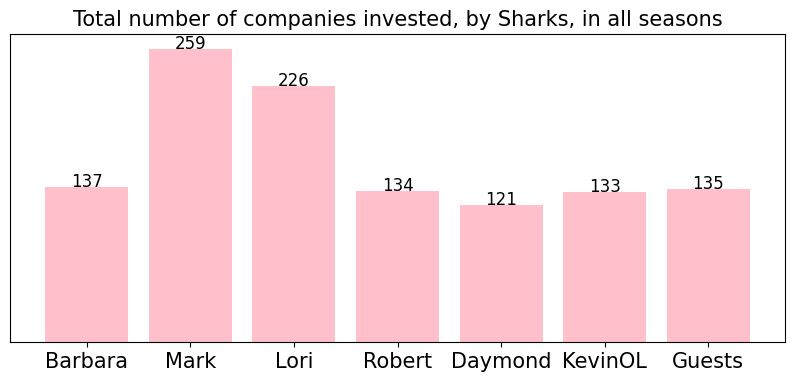

In [47]:
# Number of companies invested, in all seasons
Amount = [(shark_tank['Barbara Corcoran Investment Amount']).count(), (shark_tank['Mark Cuban Investment Amount']).count(), (shark_tank['Lori Greiner Investment Amount']).count(), (shark_tank['Robert Herjavec Investment Amount']).count(),
    (shark_tank['Daymond John Investment Amount']).count(), (shark_tank['Kevin O Leary Investment Amount']).count(), (shark_tank['Guest Investment Amount']).count()]
name=['Barbara','Mark','Lori','Robert','Daymond','KevinOL','Guests']
df = {'Name':name, 'Total Amount':Amount}
plt.figure(figsize=(10,4))
plt.bar(df['Name'], df['Total Amount'], color='pink')
plt.xticks(fontsize=15)
plt.yticks([])
for index,d in enumerate(Amount):
    plt.text(x=index, y=d, s=f"{round(d,2)}", ha = 'center', fontdict=dict(fontsize=12))
plt.title("Total number of companies invested, by Sharks, in all seasons", fontsize=15)
plt.show()

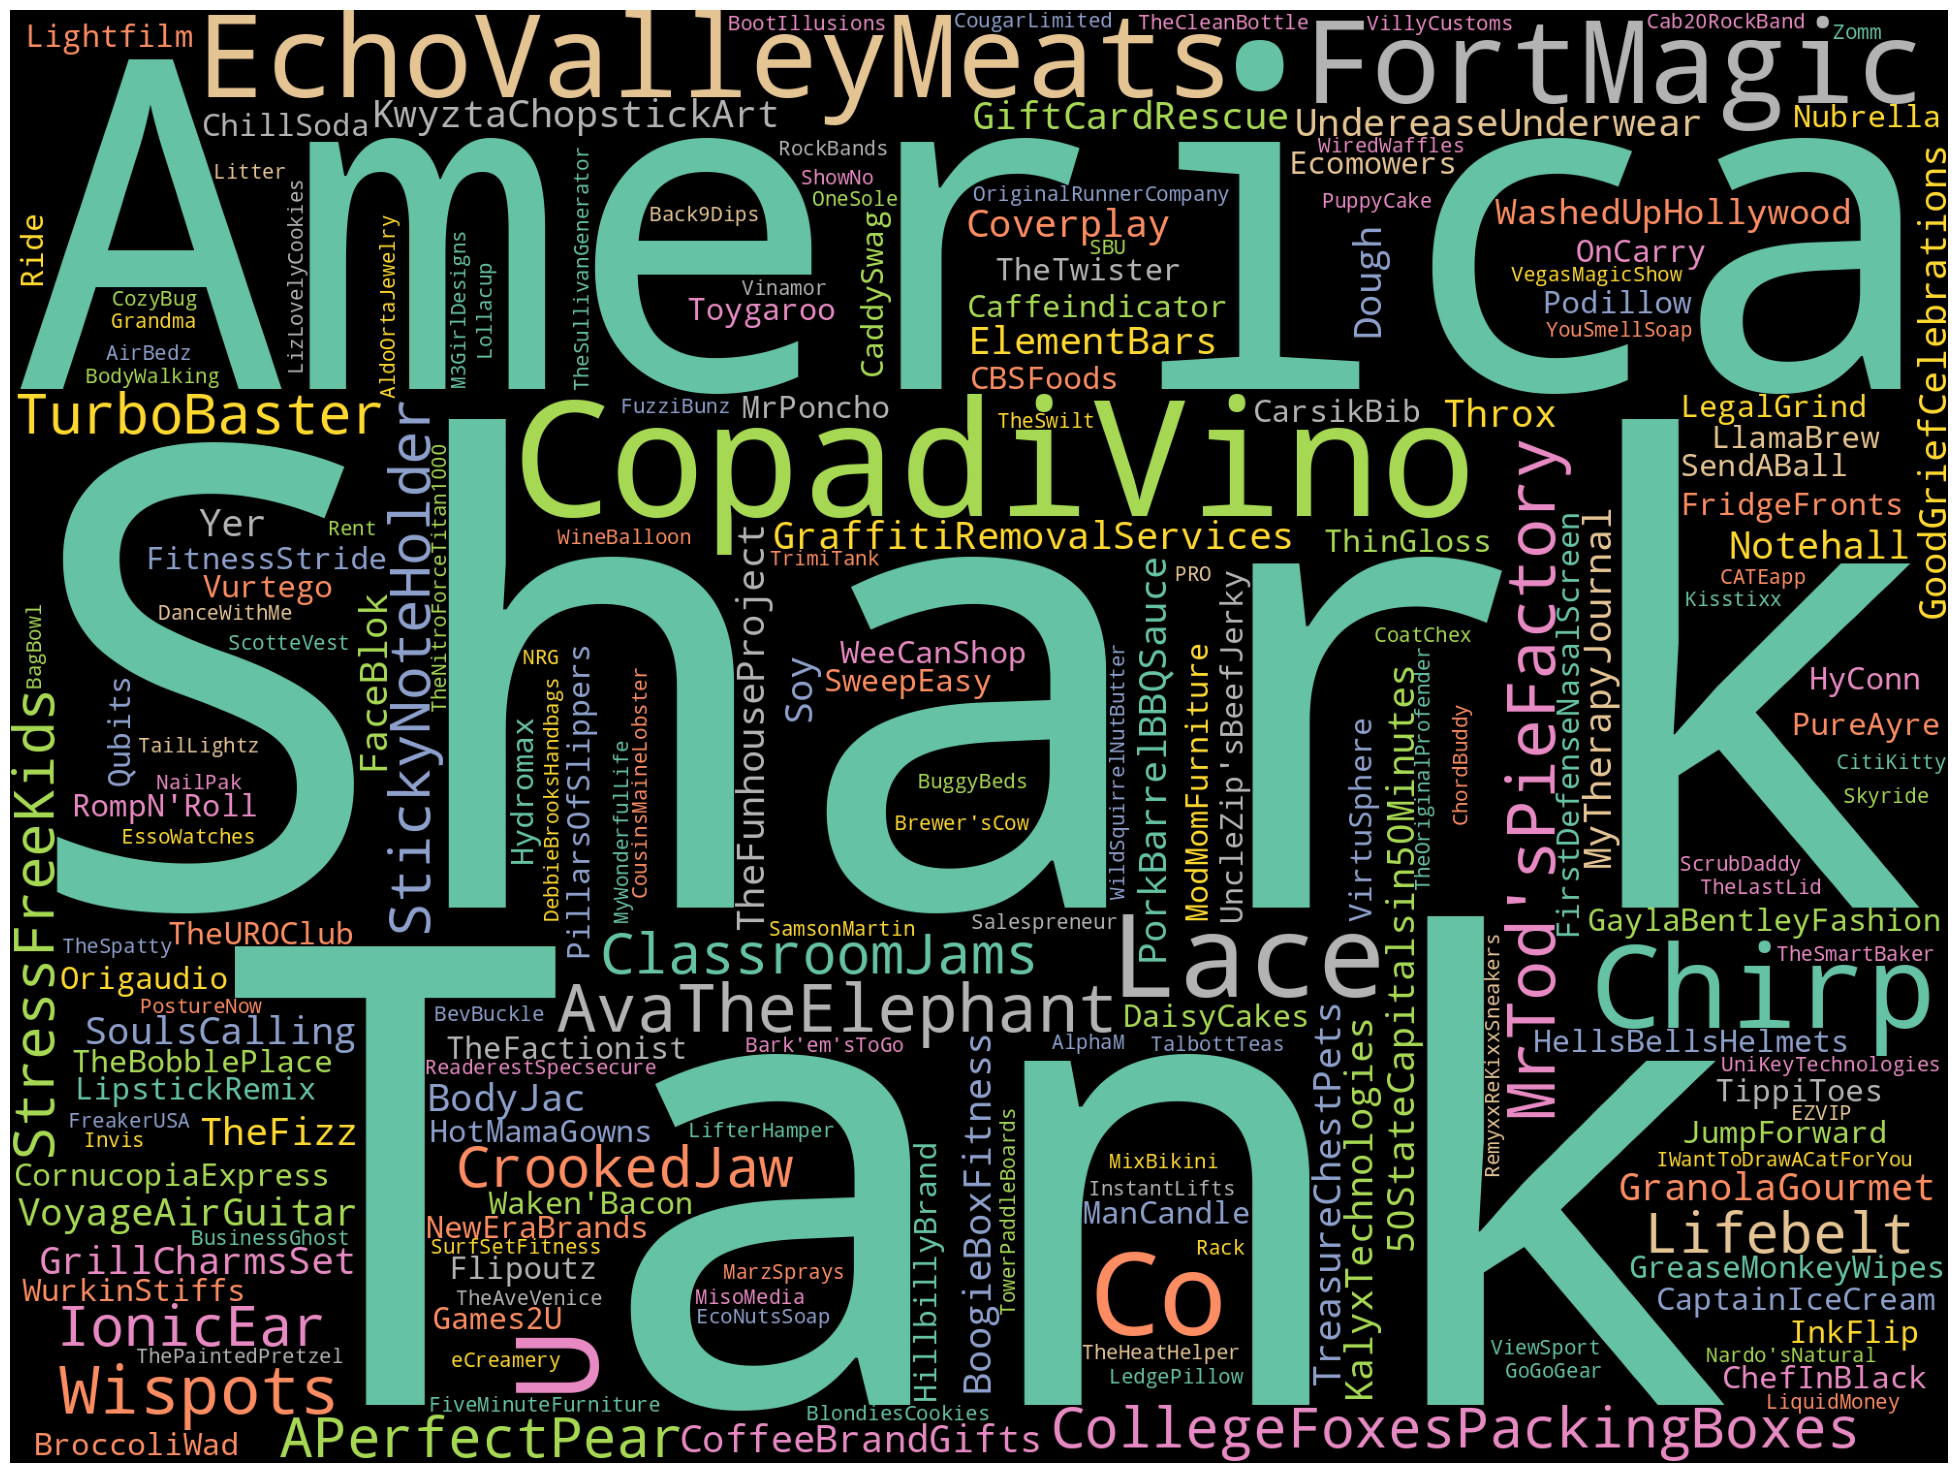

In [48]:
# Word cloud based on Startup Names, in all seasons
text = " Shark Tank America ".join(cat for cat in shark_tank['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='black', colormap='Set2', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

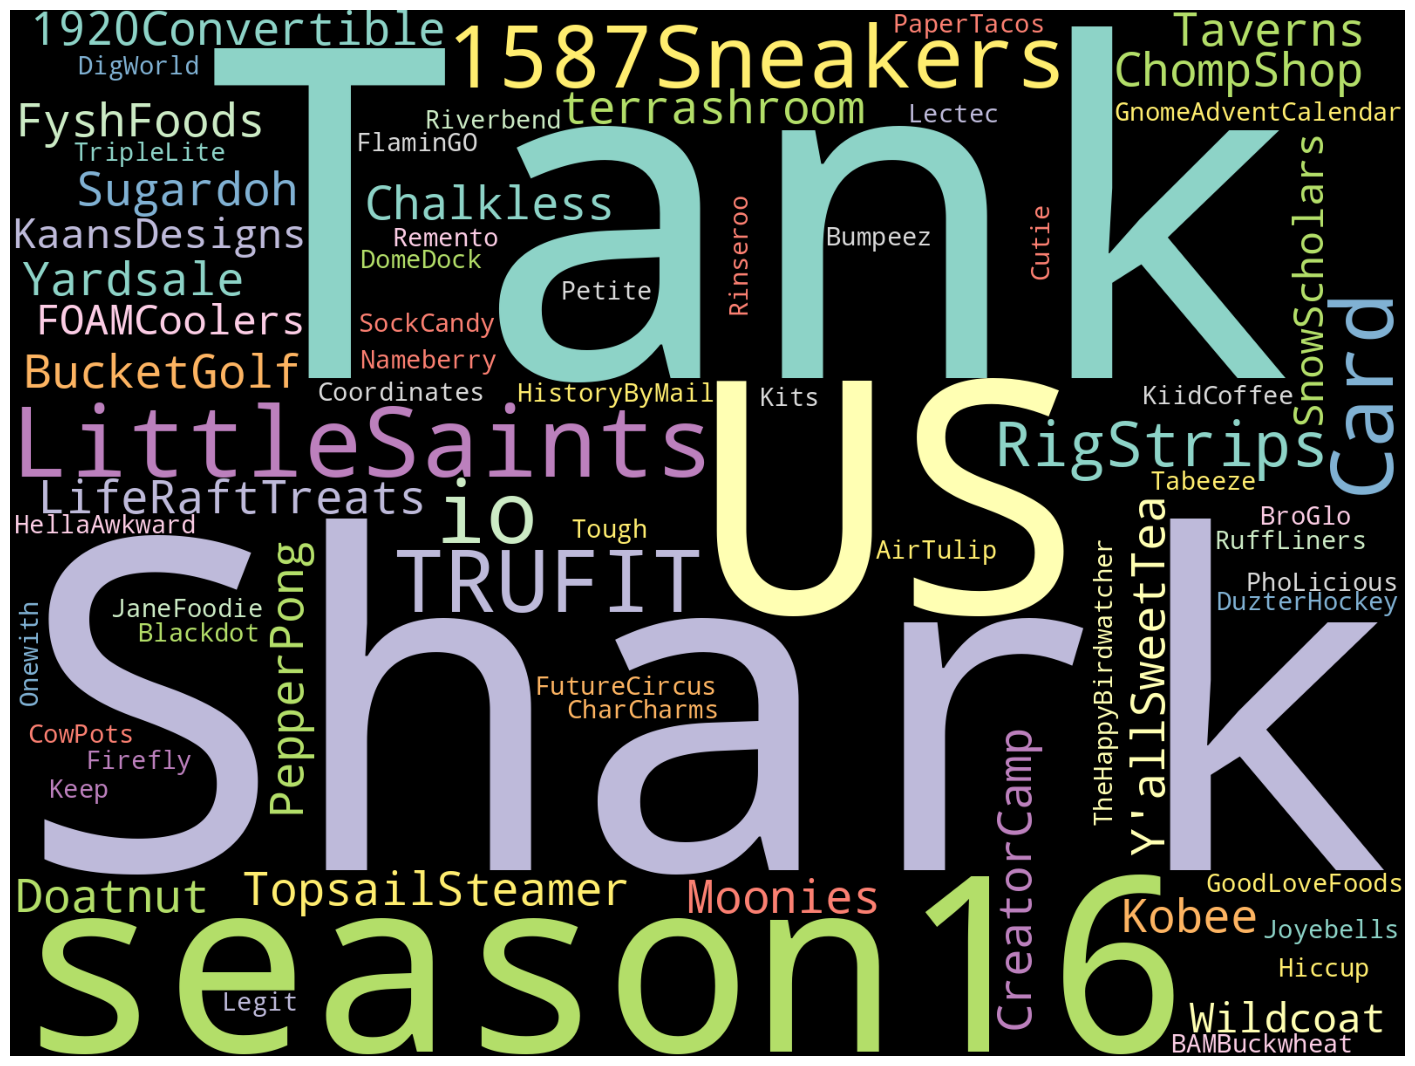

In [49]:
# Word cloud based on Startup Names, in current/latest season (16th season)
text = " Shark Tank US season16 ".join(cat for cat in shark_tank_recent['Startup Name'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=1600, height=1200, stopwords=stop_words, background_color='black', colormap='Set3', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(18,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 🔎 Shark Tank India Dataset https://www.kaggle.com/datasets/thirumani/shark-tank-india

## 🔥Barbara Corcoran's Investments


Total investments by Barbara Corcoran 137
Investment amount by Barbara Corcoran $20,448,333.33
Equity received by Barbara Corcoran 3020.2 % in different companies

Company details:
------------------------------------------------------------------------------------------
               Startup Name                Industry  Barbara Corcoran Investment Amount
             AvaTheElephant         Health/Wellness                          50000.0000
          MrTod'sPieFactory       Food and Beverage                         230000.0000
              ClassroomJams      Children/Education                          50000.0000
             StressFreeKids      Children/Education                         250000.0000
                  Coverplay      Children/Education                          35000.0000
                    BodyJac Fitness/Sports/Outdoors                         180000.0000
         PorkBarrelBBQSauce       Food and Beverage                          50000.0000
          TreasureChestP

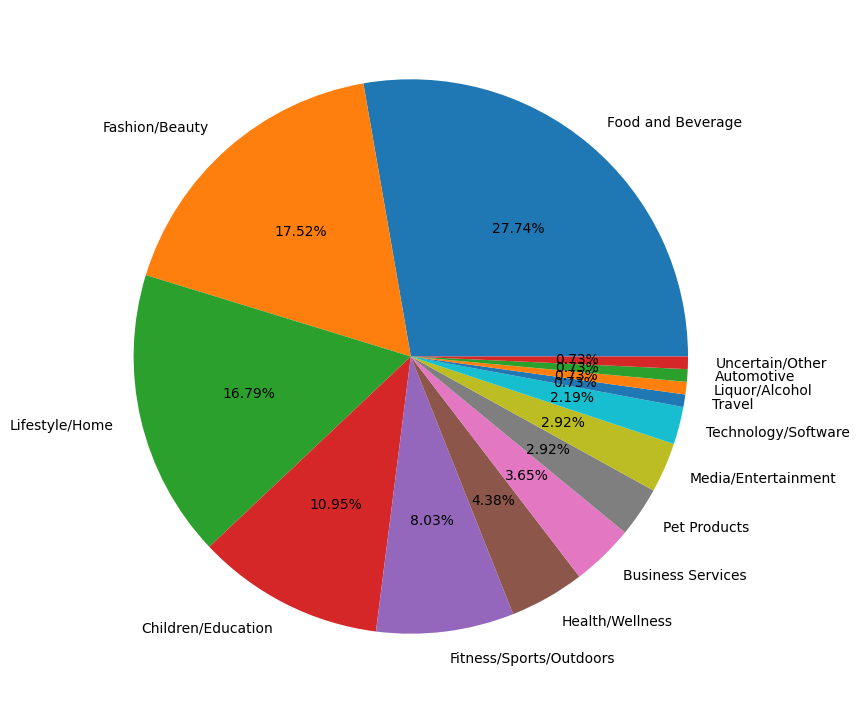

In [50]:
print("Total investments by Barbara Corcoran", shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0][['Barbara Corcoran Investment Amount']].count().to_string()[-3:])
print("Investment amount by Barbara Corcoran", format_currency(shark_tank['Barbara Corcoran Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Barbara Corcoran", round(shark_tank['Barbara Corcoran Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0][["Startup Name","Industry","Barbara Corcoran Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nBarbara Corcoran industry wise investments\n")
print(shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Barbara Corcoran Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Barbara Corcoran Investment Amount']>0] [["Startup Name","Barbara Corcoran Investment Amount","Barbara Corcoran Investment Equity"]].sort_values(by="Barbara Corcoran Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Barbara Corcoran Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🎇 Mark Cuban's Investments

Total investments by Mark Cuban 259
Investment amount by Mark Cuban $65,386,000
Equity received by Mark Cuban 4413.02 % in different companies

Company details:
------------------------------------------------------------------------------------------
             Startup Name                Industry  Mark Cuban Investment Amount
            ClassroomJams      Children/Education                  5.000000e+04
                TippiToes Fitness/Sports/Outdoors                  5.000000e+04
                 Toygaroo      Children/Education                  1.000000e+05
  FirstDefenseNasalScreen         Health/Wellness                  2.500000e+05
                   HyConn         Uncertain/Other                  1.250000e+06
                    EZVIP     Media/Entertainment                  7.500000e+04
           TheCleanBottle       Food and Beverage                  6.000000e+04
    IWantToDrawACatForYou     Technology/Software                  2.500000e+04
              WineBalloon   

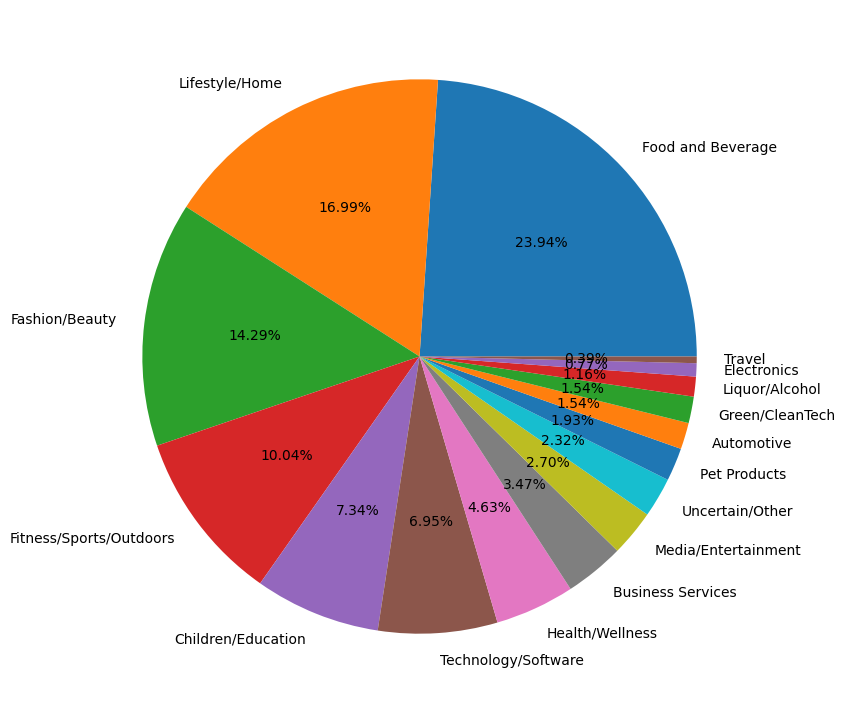

In [51]:
print("Total investments by Mark Cuban", shark_tank[shark_tank['Mark Cuban Investment Amount']>0][['Mark Cuban Investment Amount']].count().to_string()[-3:])
print("Investment amount by Mark Cuban", format_currency(shark_tank['Mark Cuban Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Mark Cuban", round(shark_tank['Mark Cuban Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0][["Startup Name","Industry","Mark Cuban Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nMark Cuban industry wise investments\n")
print(shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Mark Cuban Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Mark Cuban Investment Amount']>0] [["Startup Name","Mark Cuban Investment Amount","Mark Cuban Investment Equity"]].sort_values(by="Mark Cuban Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Mark Cuban Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## ✳️ Lori Greiner's Investments

Total investments by Lori Greiner 226
Investment amount by Lori Greiner $48,485,500
Equity received by Lori Greiner 3531.91 % in different companies

Company details:
------------------------------------------------------------------------------------------
          Startup Name                Industry  Lori Greiner Investment Amount
                ShowNo          Fashion/Beauty                    7.500000e+04
         M3GirlDesigns          Fashion/Beauty                    1.000000e+05
   ReaderestSpecsecure          Lifestyle/Home                    1.500000e+05
               NailPak          Fashion/Beauty                    5.000000e+04
               BagBowl          Lifestyle/Home                    4.000000e+04
             Back9Dips       Food and Beverage                    7.500000e+04
            MarzSprays         Health/Wellness                    2.000000e+05
            ScrubDaddy          Lifestyle/Home                    2.000000e+05
          TheCoolWazoo      Chi

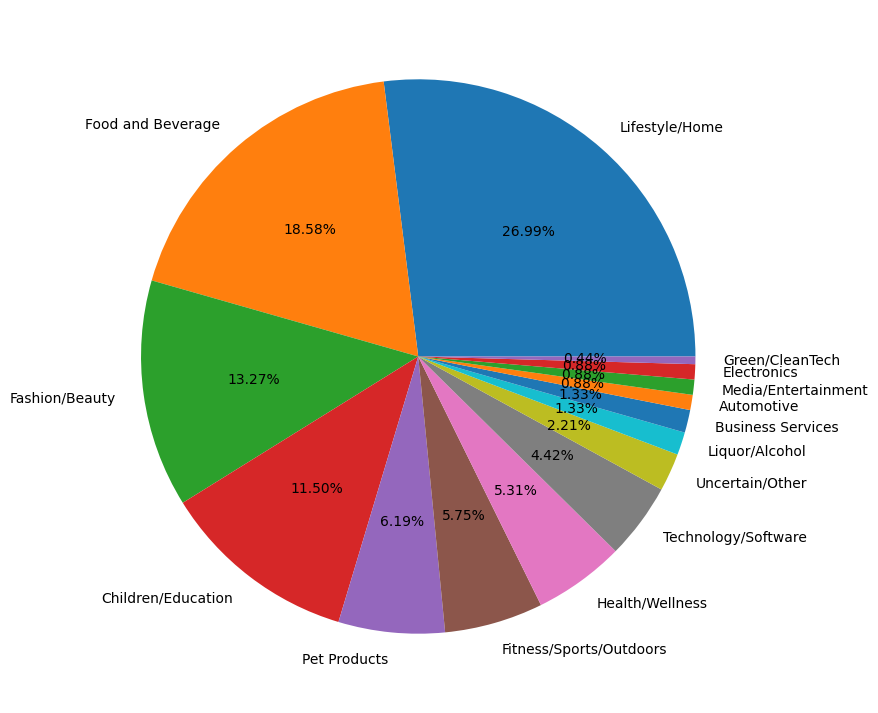

In [52]:
print("Total investments by Lori Greiner", shark_tank[shark_tank['Lori Greiner Investment Amount']>0][['Lori Greiner Investment Amount']].count().to_string()[-3:])
print("Investment amount by Lori Greiner", format_currency(shark_tank['Lori Greiner Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Lori Greiner", round(shark_tank['Lori Greiner Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0][["Startup Name","Industry","Lori Greiner Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nLori Greiner industry wise investments\n")
print(shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Lori Greiner Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Lori Greiner Investment Amount']>0] [["Startup Name","Lori Greiner Investment Amount","Lori Greiner Investment Equity"]].sort_values(by="Lori Greiner Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Lori Greiner Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🚀 Robert Herjavec's Investments

Total investments by Robert Herjavec 134
Investment amount by Robert Herjavec $37,580,666
Equity received by Robert Herjavec 2405.75 % in different companies

Company details:
------------------------------------------------------------------------------------------
           Startup Name                Industry  Robert Herjavec Investment Amount
           APerfectPear       Food and Beverage                       2.500000e+05
          ClassroomJams      Children/Education                       5.000000e+04
         GiftCardRescue     Technology/Software                       1.000000e+05
       MyTherapyJournal         Health/Wellness                       4.000000e+04
          Soy-Yer-Dough       Food and Beverage                       1.000000e+05
         GrillCharmsSet          Fashion/Beauty                       5.000000e+04
            JumpForward      Children/Education                       3.000000e+05
      GreaseMonkeyWipes          Lifestyle/Home                      

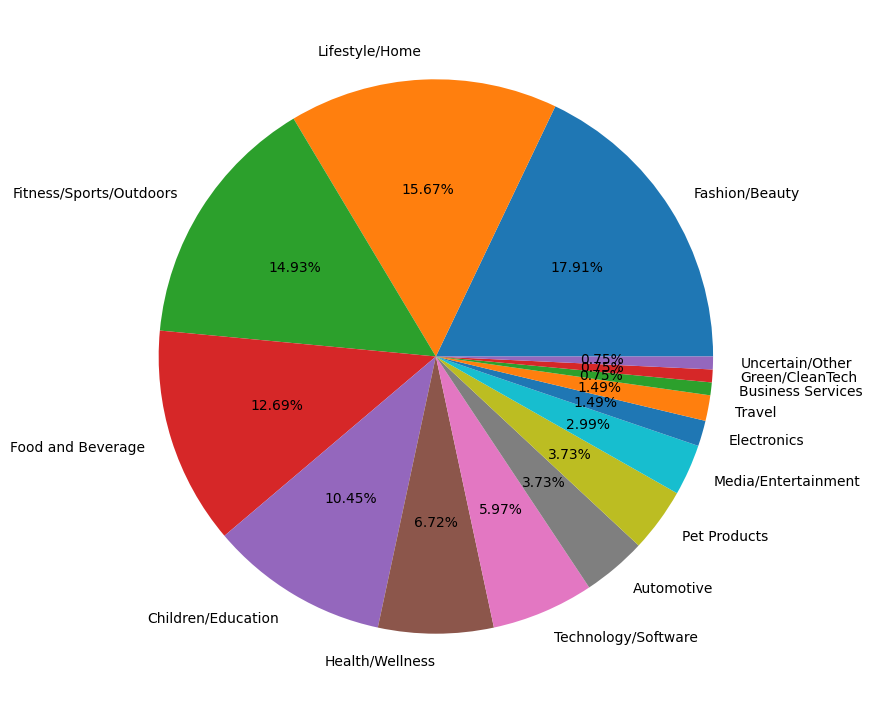

In [53]:
print("Total investments by Robert Herjavec", shark_tank[shark_tank['Robert Herjavec Investment Amount']>0][['Robert Herjavec Investment Amount']].count().to_string()[-3:])
print("Investment amount by Robert Herjavec", format_currency(shark_tank['Robert Herjavec Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Robert Herjavec", round(shark_tank['Robert Herjavec Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0][["Startup Name","Industry","Robert Herjavec Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nRobert Herjavec industry wise investments\n")
print(shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Robert Herjavec Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Robert Herjavec Investment Amount']>0] [["Startup Name","Robert Herjavec Investment Amount","Robert Herjavec Investment Equity"]].sort_values(by="Robert Herjavec Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Robert Herjavec Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🎾 Daymond John's Investments

Total investments by Daymond John 121
Investment amount by Daymond John $21,590,666.67
Equity received by Daymond John 3034.28 % in different companies

Company details:
------------------------------------------------------------------------------------------
               Startup Name                Industry  Daymond John Investment Amount
          MrTod'sPieFactory       Food and Beverage                     230000.0000
              ClassroomJams      Children/Education                      50000.0000
              Soy-Yer-Dough       Food and Beverage                     100000.0000
          TreasureChestPets            Pet Products                      50000.0000
        GaylaBentleyFashion          Fashion/Beauty                     125000.0000
          HellsBellsHelmets Fitness/Sports/Outdoors                     500000.0000
              LipstickRemix          Fashion/Beauty                      52500.0000
                   Nubrella          Fashion/Beauty                

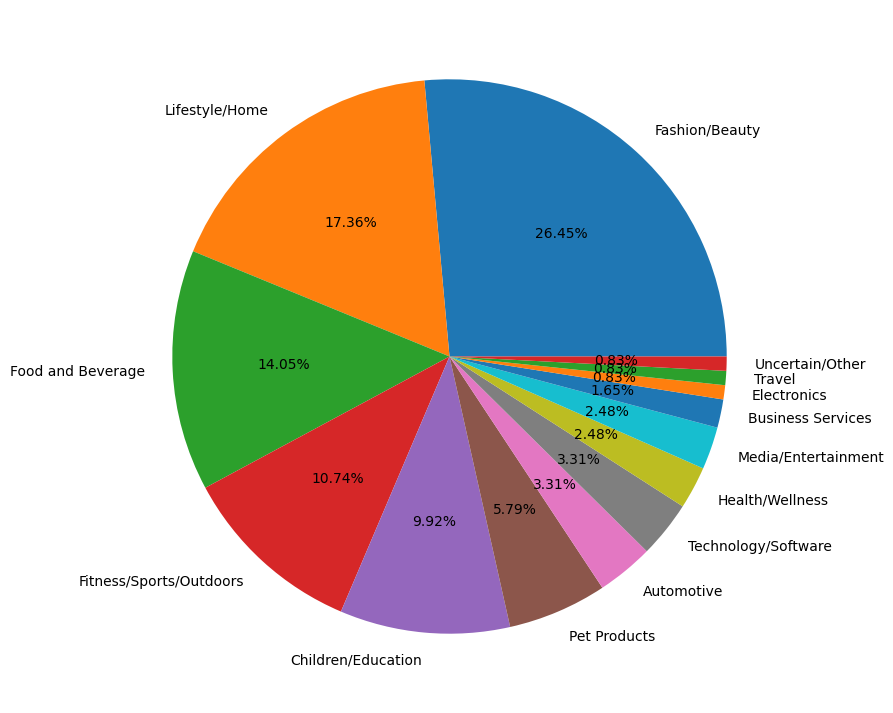

In [54]:
print("Total investments by Daymond John", shark_tank[shark_tank['Daymond John Investment Amount']>0][['Daymond John Investment Amount']].count().to_string()[-3:])
print("Investment amount by Daymond John", format_currency(shark_tank['Daymond John Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Daymond John", round(shark_tank['Daymond John Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Daymond John Investment Amount']>0][["Startup Name","Industry","Daymond John Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nDaymond John industry wise investments\n")
print(shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Daymond John Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Daymond John Investment Amount']>0] [["Startup Name","Daymond John Investment Amount","Daymond John Investment Equity"]].sort_values(by="Daymond John Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Daymond John Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## ⭐ Kevin O Leary's Investments

Total investments by Kevin O Leary 133
Investment amount by Kevin O Leary $32,030,833.33
Equity received by Kevin O Leary 1988.62 % in different companies

Company details:
------------------------------------------------------------------------------------------
          Startup Name                Industry  Kevin O Leary Investment Amount
          APerfectPear       Food and Beverage                     2.500000e+05
         ClassroomJams      Children/Education                     5.000000e+04
        GiftCardRescue     Technology/Software                     1.000000e+05
      MyTherapyJournal         Health/Wellness                     4.000000e+04
         Soy-Yer-Dough       Food and Beverage                     1.000000e+05
           JumpForward      Children/Education                     3.000000e+05
              Toygaroo      Children/Education                     1.000000e+05
          FridgeFronts          Lifestyle/Home                     5.000000e+04
           Talbo

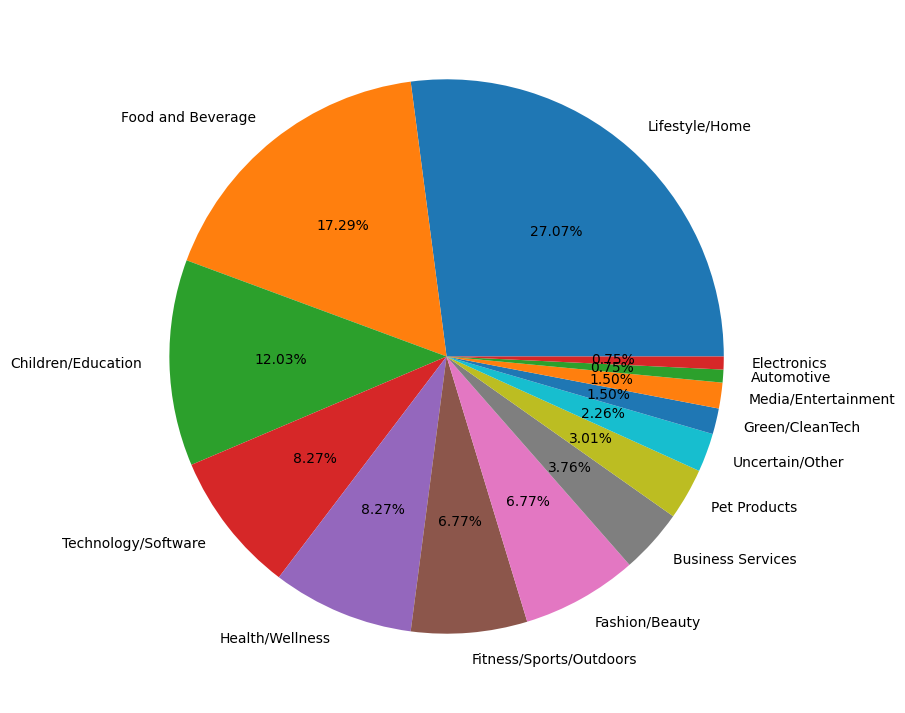

In [55]:
print("Total investments by Kevin O Leary", shark_tank[shark_tank['Kevin O Leary Investment Amount']>0][['Kevin O Leary Investment Amount']].count().to_string()[-3:])
print("Investment amount by Kevin O Leary", format_currency(shark_tank['Kevin O Leary Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by Kevin O Leary", round(shark_tank['Kevin O Leary Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*90)
print(shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0][["Startup Name","Industry","Kevin O Leary Investment Amount"]].to_string(index=False))
print('-'*90)

print("\nKevin O Leary industry wise investments\n")
print(shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Kevin O Leary Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Kevin O Leary Investment Amount']>0] [["Startup Name","Kevin O Leary Investment Amount","Kevin O Leary Investment Equity"]].sort_values(by="Kevin O Leary Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Kevin O Leary Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

## 🎆 All Guest's Investments
#### (Shark who presented in fewer seasons)

Total investments by all Guests 35
Investment amount by all Guests $28,149,166.67
Equity received by all Guests 1994.8 % in different companies

Company details:
--------------------------------------------------------------------------------------------
             Startup Name                Industry  Guest Investment Amount        Guest Name
              TurboBaster       Food and Beverage             3.500000e+04  Kevin Harrington
              ElementBars Fitness/Sports/Outdoors             1.500000e+05  Kevin Harrington
               TheUROClub Fitness/Sports/Outdoors             2.500000e+04  Kevin Harrington
           Caffeindicator       Food and Beverage             2.000000e+05  Kevin Harrington
                 Hydromax Fitness/Sports/Outdoors             5.000000e+04    Jeff Foxworthy
                CitiKitty            Pet Products             1.000000e+05  Kevin Harrington
               Tree-T-Pee         Green/CleanTech             1.500000e+05 John Paul DeJoria
 

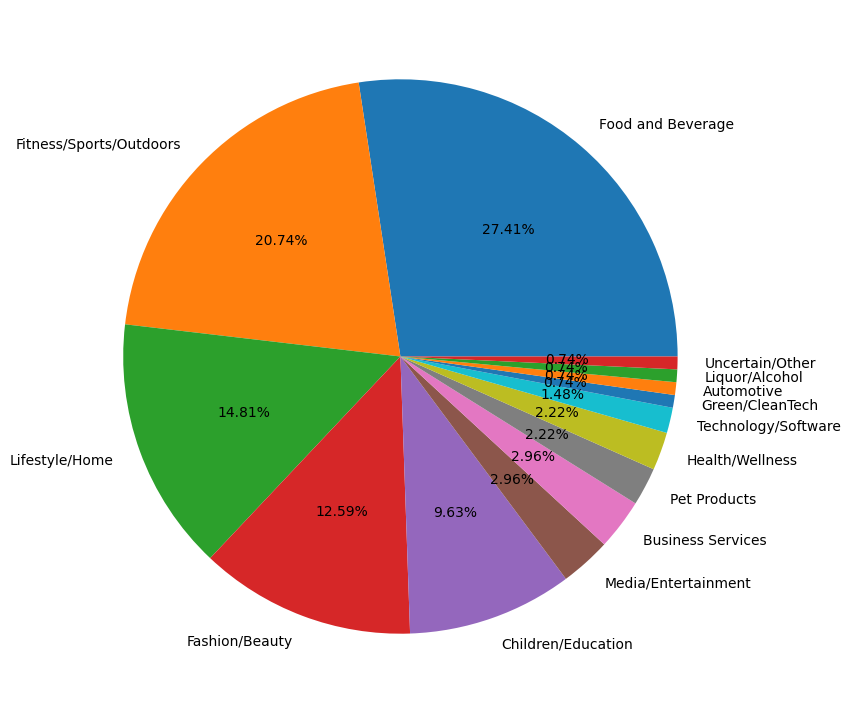

In [56]:
print("Total investments by all Guests", shark_tank[shark_tank['Guest Investment Amount']>0][['Guest Investment Amount']].count().to_string()[-2:])
print("Investment amount by all Guests", format_currency(shark_tank['Guest Investment Amount'].sum(), 'USD', locale='en_US').replace(".00", ""))
print("Equity received by all Guests", round(shark_tank['Guest Investment Equity'].sum(), 2), "% in different companies")

print("\nCompany details:")
print('-'*92)
print(shark_tank.loc[shark_tank['Guest Investment Amount']>0][["Startup Name","Industry","Guest Investment Amount","Guest Name"]].to_string(index=False))
print('-'*92)

print("\nAll Guests industry wise investments\n")
print(shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False))
plt.figure(figsize = (15,9))
shark_tank[shark_tank['Guest Investment Amount']>0]['Industry'].value_counts().sort_values(ascending=False).plot.pie(autopct='%1.2f%%')
plt.ylabel('')
plt.show()

tmpdf = shark_tank.loc[shark_tank['Guest Investment Amount']>0] [["Startup Name","Guest Investment Amount","Guest Investment Equity"]].sort_values(by="Guest Investment Equity")
fig = px.treemap(tmpdf, path=['Startup Name'], values=tmpdf['Guest Investment Amount'], width=850, height=800)
fig.update_layout(margin = dict(t=5, l=5, r=5, b=5))
fig.update_traces(textposition='middle center')
fig.show(renderer="iframe")

In [57]:
# Top 10, guest sharks who invested in most number of companies
shark_tank.loc[shark_tank['Guest Investment Amount'] > 1].groupby('Guest Name').size().nlargest(10)

Guest Name
Daniel Lubetzky     23
Emma Grede           9
Alex Rodriguez       8
Chris Sacca          8
Rohan Oza            8
Kendra Scott         6
Kevin Harrington     5
Matt Higgins         4
Michael Rubin        4
Peter Jones          4
dtype: int64

In [58]:
# Investment amount by guests, in Millions
round(shark_tank.groupby(["Guest Name"])["Guest Investment Amount"].sum().sort_values(ascending=False)/1000000,2)

Guest Name
Daniel Lubetzky      5.57
Rohan Oza            3.58
Chris Sacca          1.57
Matt Higgins         1.52
Emma Grede           1.45
Kendra Scott         1.35
Alex Rodriguez       1.24
Michael Rubin        0.98
Tony Xu              0.88
Rashuan Williams     0.82
Peter Jones          0.80
Todd Graves          0.70
Sara Blakely         0.70
Rashaun Williams     0.70
Kevin Hart           0.65
Kevin Harrington     0.51
Jamie Siminoff       0.50
Candace Nelson       0.50
Maria Sharapova      0.45
Jason Blum           0.45
Charles Barkley      0.38
Richard Branson      0.36
Gwyneth Paltrow      0.32
Nirav Tolia          0.30
Anne Wojcicki        0.25
Jamie Lima           0.23
Ashton Kutcher       0.20
Katrina Lake         0.20
Blake Mycoskie       0.20
Troy Carter          0.20
John Paul DeJoria    0.15
Nick Woodman         0.12
Bethenny Frankel     0.12
Alli Webb            0.09
Jeff Foxworthy       0.05
Steve Tisch          0.05
Name: Guest Investment Amount, dtype: float64

Number of Sharks in Deal
1.0    639
2.0    199
3.0     22
5.0      6
4.0      3
Name: count, dtype: int64 

Number of Sharks in Deal
1.0    74%
2.0    23%
3.0     3%
5.0     1%
4.0     0%
Name: proportion, dtype: object


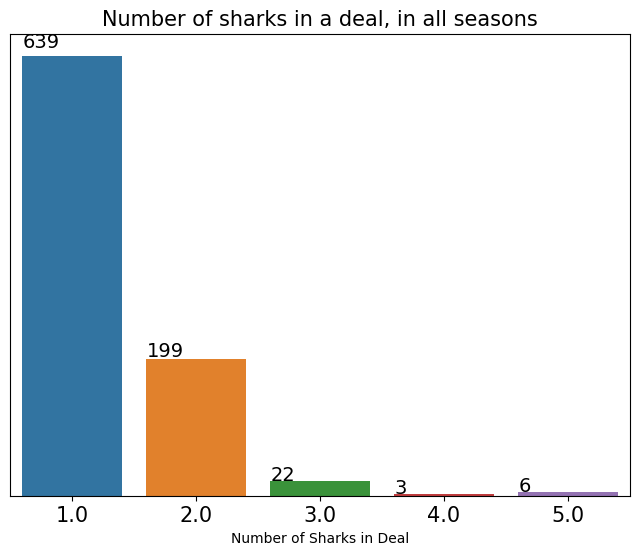

In [59]:
# Number of sharks in a deal, in all seasons
print(shark_tank['Number of Sharks in Deal'].value_counts(), "\n")

# In percentage
print(round(shark_tank['Number of Sharks in Deal'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

fig = plt.figure(figsize=(8, 6))
plt.title("Number of sharks in a deal, in all seasons", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks([])
ax = sns.countplot(data = shark_tank, x = 'Number of Sharks in Deal')
ax.set_ylabel('')
for t in ax.patches:
    if (np.isnan(float(t.get_height()))):
        ax.annotate(0, (t.get_x(), 0))
    else:
        ax.annotate(str(format(int(t.get_height()), ',d')), (t.get_x(), t.get_height()*1.02), size=14)

In [60]:
# All sharks deals
print(shark_tank.loc[shark_tank['Number of Sharks in Deal'] >= 5][["Season Number","Startup Name","Total Deal Amount","Total Deal Equity"]])

      Season Number   Startup Name  Total Deal Amount  Total Deal Equity
6                 1  ClassroomJams           250000.0              100.0
161               4      BuggyBeds           250000.0               25.0
268               5   Breathometer          1000000.0               30.0
514               7         XCraft          1500000.0               25.0
814              10    CupBoardPro           100000.0               20.0
1272             14        Eyewris           125000.0               20.0


In [61]:
# Sharks with most number of solo deals
amt_cols = shark_tank.columns[shark_tank.columns.str.contains(' Investment Amount')].tolist()
tmp = shark_tank.loc[shark_tank['Number of Sharks in Deal'] == 1][amt_cols]
tmp.count().sort_values(ascending=False).nlargest(3)

# MarkCuban did most number of solo deals, than any other Shark

Mark Cuban Investment Amount          134
Lori Greiner Investment Amount        112
Barbara Corcoran Investment Amount     91
dtype: int64

In [62]:
# Sharks with most number of episode presence, in all seasons
present_cols = shark_tank.columns[shark_tank.columns.str.endswith(' Present')].tolist()
tmp = shark_tank[present_cols]
tmp.sum().sort_values(ascending=False).nlargest(3)

# Kevin was there in most number of episodes

Kevin O Leary Present      1005.0
Mark Cuban Present          956.0
Robert Herjavec Present     844.0
dtype: float64

In [63]:
# Top 20 US 🇺🇸 states of pitcher's
tmp = shark_tank['Pitchers State'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 States</b> from where pitchers came from", template='simple_white', text=tmp, width=850, height=750)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [64]:
# Top 20 US cities
tmp = shark_tank['Pitchers City'].value_counts().nlargest(20).sort_values(ascending=True)
fig = px.bar(tmp, x=tmp.values, title="<b>Top 20 USA cities</b> with number of startups came for pitching", template='simple_white', text=tmp, width=850, height=800)
fig.update_yaxes(title_text="")
fig.update_xaxes(visible=False)
fig.show(renderer="iframe")

In [65]:
# Most frequently asked amount, by startups
shark_tank.groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (USD) and Number of times asked

Original Ask Amount
100000.0    178
200000.0    151
150000.0    150
500000.0    146
250000.0    131
300000.0    110
50000.0      90
400000.0     58
75000.0      57
125000.0     31
dtype: int64

In [66]:
# Most frequently offered equity, by startups
shark_tank.groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number of times offered

Original Offered Equity
10.0    469
20.0    229
5.0     220
15.0    162
25.0     73
8.0      33
30.0     33
7.0      19
2.5      17
4.0      16
dtype: int64

In [67]:
# ✅ Most frequently invested amount, by Sharks
shark_tank.groupby('Total Deal Amount').size().nlargest(10)

# Sharks mostly invested more than 100K per deal

# Total Deal Amount (USD) and Number of times invested

Total Deal Amount
100000.0    114
200000.0     99
150000.0     92
250000.0     80
300000.0     79
500000.0     78
50000.0      46
75000.0      36
400000.0     31
350000.0     21
dtype: int64

In [68]:
# ✅ Most frequently received total equity, by Sharks
shark_tank.groupby('Total Deal Equity').size().nlargest(10)

# Sharks are expecting more than 20% equity, in a deal

# Total Deal Equity (in %) and Number of times invested

Total Deal Equity
20.0    146
25.0    127
10.0     88
15.0     86
30.0     73
40.0     36
50.0     34
5.0      29
33.3     25
33.0     23
dtype: int64

In [69]:
# Most frequently asked amount (in USD), deals received percentage and not received percentage, in sucessful deal ✅
tmp2 = pd.crosstab(shark_tank['Original Ask Amount'], shark_tank['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
100000.0             65.0                35.0
150000.0             65.0                35.0
200000.0             64.0                36.0
250000.0             66.0                34.0
500000.0             54.0                46.0
300000.0             65.0                35.0
50000.0              64.0                36.0
75000.0              61.0                39.0
400000.0             59.0                41.0
350000.0             80.0                20.0

In [70]:
# Frequently asked amount (in USD), deals received percentage and not received percentage, in unsucessful deal ❌
tmp2 = pd.crosstab(shark_tank['Original Ask Amount'], shark_tank['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=True)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(15)

deal_percentage  no_deal_percentage
155000.0              0.0               100.0
540000.0              0.0               100.0
57000.0               0.0               100.0
625000.0              0.0               100.0
285000.0              0.0               100.0
360000.0              0.0               100.0
260000.0              0.0               100.0
48000.0               0.0               100.0
212000.0              0.0               100.0
140000.0              0.0               100.0
14000.0               0.0               100.0
258000.0              0.0               100.0
86000.0               0.0               100.0
240000.0            100.0                 0.0
270000.0            100.0                 0.0

In [71]:
# Most frequently asked equity, deals received percentage and not received percentage, in sucessful deal ✅
tmp2 = pd.crosstab(shark_tank['Original Offered Equity'], shark_tank['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=False)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
10.0             65.0                35.0
5.0              64.0                36.0
20.0             51.0                49.0
15.0             63.0                37.0
25.0             53.0                47.0
8.0              58.0                42.0
30.0             48.0                52.0
7.0              84.0                16.0
4.0              81.0                19.0
2.5              71.0                29.0

In [72]:
# Fequently asked equity, deals received percentage and not received percentage, in unsucessful deal ❌
tmp2 = pd.crosstab(shark_tank['Original Offered Equity'], shark_tank['Got Deal']).add_prefix('deal_').rename_axis(index=None, columns=None).sort_values('deal_1',ascending=True)
tmp2['deal_percentage'] = round((tmp2['deal_1'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2['no_deal_percentage'] = round((tmp2['deal_0'] / (tmp2['deal_0'] + tmp2['deal_1']))*100,0)
tmp2[['deal_percentage','no_deal_percentage']].head(10)

deal_percentage  no_deal_percentage
13.50               0.0               100.0
34.00               0.0               100.0
29.00               0.0               100.0
15.87               0.0               100.0
70.00               0.0               100.0
7.60                0.0               100.0
6.50                0.0               100.0
4.50                0.0               100.0
100.00              0.0               100.0
1.50                0.0               100.0

In [73]:
# Mostly successful combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Got Deal'] == 1].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in US Shark Tank, ask for 150K-300K with 10% equity ✅

Original Ask Amount  Original Offered Equity
200000.0             10.0                       46
100000.0             10.0                       43
150000.0             10.0                       42
300000.0             10.0                       36
250000.0             10.0                       30
100000.0             20.0                       27
500000.0             10.0                       22
                     5.0                        21
150000.0             15.0                       20
250000.0             5.0                        20
dtype: int64

In [74]:
# Most frequently asked amount, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Got Deal'] == 0].groupby('Original Ask Amount').size().nlargest(10)

# Original Ask Amount (USD) and Number of times asked (but rejected by sharks) ❌

Original Ask Amount
500000.0    67
100000.0    62
200000.0    54
150000.0    52
250000.0    45
300000.0    39
50000.0     32
400000.0    24
75000.0     22
125000.0    15
dtype: int64

In [75]:
# Most frequently offered equity, by startups who could NOT get a deal
shark_tank.loc[shark_tank['Got Deal'] == 0].groupby('Original Offered Equity').size().nlargest(10)

# Original Offered Equity (in %) and Number of times offered (but rejected by sharks) ❌

Original Offered Equity
10.0    162
20.0    112
5.0      79
15.0     60
25.0     34
30.0     17
8.0      14
40.0      8
3.0       6
2.5       5
dtype: int64

In [76]:
# Mostly rejected combinations (of asked amount and offered equity)
shark_tank.loc[shark_tank['Got Deal'] == 0].groupby(['Original Ask Amount','Original Offered Equity']).size().nlargest(10)

# If you are pitching in Shark Tank US, don't ask for 100K with 10%/20% equity or 500K with 5% equity 🔴

Original Ask Amount  Original Offered Equity
100000.0             10.0                       24
500000.0             5.0                        24
100000.0             20.0                       21
200000.0             10.0                       18
250000.0             10.0                       17
300000.0             10.0                       17
150000.0             10.0                       16
200000.0             20.0                       14
500000.0             10.0                       14
150000.0             20.0                       12
dtype: int64

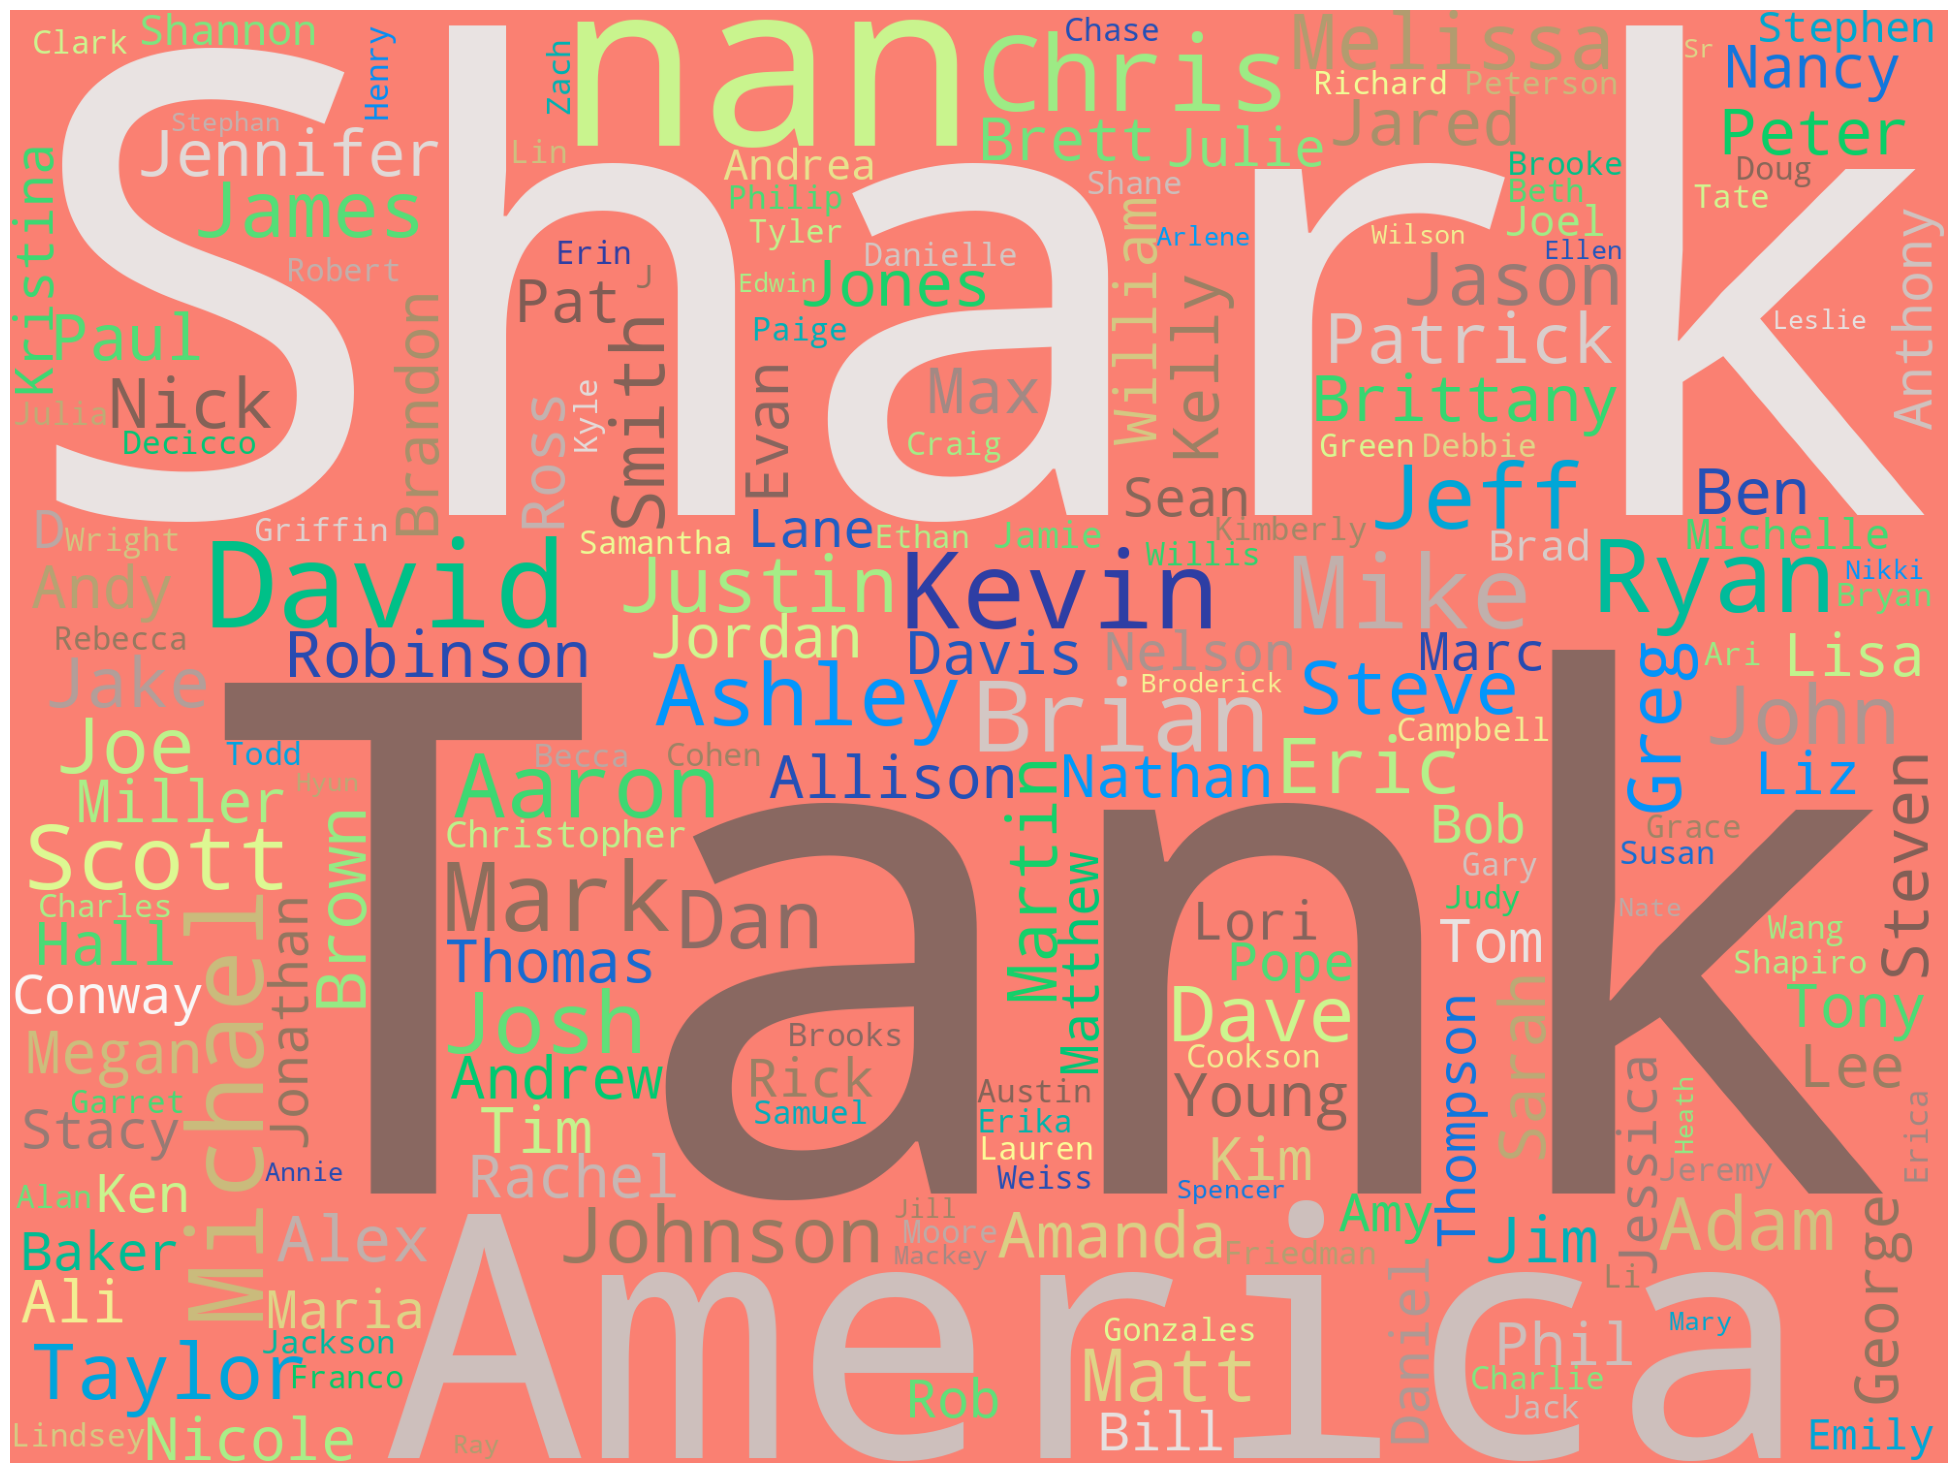

In [77]:
# Word cloud based on Pitcher name
text = " Shark Tank America ".join(cat for cat in shark_tank['Entrepreneur Names'].astype(str))
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='terrain_r', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [78]:
# Many companies got more amount than they asked/expected
print(shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Original Ask Amount'] < shark_tank["Total Deal Amount"]][["Season Number","Startup Name","Original Ask Amount","Total Deal Amount"]]

Startup Name    136
dtype: int64


Season Number    Startup Name  Original Ask Amount  Total Deal Amount
15                1  GiftCardRescue             150000.0           200000.0
30                1   Soy-Yer-Dough             125000.0           300000.0
43                1     JumpForward             150000.0           600000.0
64                2    WurkinStiffs              85000.0           100000.0
65                2       TippiToes              30000.0           100000.0
...             ...             ...                  ...                ...
1349             15           VSEAT             150000.0           200000.0
1354             15            HYPD             125000.0           350000.0
1371             16         Doatnut             100000.0           200000.0
1372             16        Yardsale             200000.0           250000.0
1386             16    SnowScholars              75000.0           150000.0

[136 rows x 4 columns]

In [79]:
# Most of the companies diluted/gave their company equity more than they initially offered/expected
shark_tank.loc[shark_tank['Original Offered Equity'] < shark_tank["Total Deal Equity"]][["Season Number","Startup Name","Original Offered Equity","Total Deal Equity"]]

Season Number       Startup Name  Original Offered Equity  \
0                 1     AvaTheElephant                     15.0   
1                 1  MrTod'sPieFactory                     10.0   
5                 1       APerfectPear                     15.0   
6                 1      ClassroomJams                     10.0   
10                1        TurboBaster                     35.0   
...             ...                ...                      ...   
1413             16            Firefly                      2.5   
1416             16       DuzterHockey                     10.0   
1417             16      HistoryByMail                     10.0   
1418             16            CowPots                     10.0   
1420             16         PaperTacos                     10.0   

      Total Deal Equity  
0                  55.0  
1                  50.0  
5                  50.0  
6                 100.0  
10                100.0  
...                 ...  
1413                5.0  
1416               20.0  
1417               20.0  
1418               20.0  
1420               25.0  

[743 rows x 4 columns]

In [80]:
# Below (105) companies got the same valuation they requested (with or without loan)
print(shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] == shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    111
dtype: int64


Season Number       Startup Name  Valuation Requested  Deal Valuation
51                1  GreaseMonkeyWipes             100000.0        100000.0
60                1             Qubits             176471.0        176471.0
78                2    Ride-OnCarry-On             200000.0        200000.0
85                2         DaisyCakes             200000.0        200000.0
92                2             HyConn            1250000.0       1250000.0
...             ...                ...                  ...             ...
1386             16       SnowScholars             750000.0        750000.0
1394             16         Legit Kits            3000000.0       3000000.0
1400             16           Rinseroo            6860000.0       6860000.0
1409             16       HellaAwkward            2000000.0       2000000.0
1412             16           DigWorld            2000000.0       2000000.0

[111 rows x 4 columns]

In [81]:
# There are 49 companies which got more valuation than they pitched
print(shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Startup Name"]].count())
shark_tank.loc[shark_tank['Valuation Requested'] < shark_tank["Deal Valuation"]][["Season Number","Startup Name","Valuation Requested","Deal Valuation"]]

Startup Name    49
dtype: int64


Season Number              Startup Name  Valuation Requested  \
30                1             Soy-Yer-Dough             500000.0   
31                1            GrillCharmsSet             200000.0   
77                2            HillbillyBrand             200000.0   
84                2                 SweepEasy             160000.0   
104               3     IWantToDrawACatForYou              40000.0   
112               3               WineBalloon             133333.0   
113               3                    ShowNo             200000.0   
149               3             BootIllusions             333333.0   
232               4              Lose12Inches             480000.0   
268               5              Breathometer            2500000.0   
276               5                 Hamboards             666667.0   
285               5                  FiberFix             900000.0   
323               5        TheCookieDoughCafe             250000.0   
324               5                Cycloramic            1800000.0   
336               5                RevoLights            1500000.0   
400               6          BeatBoxBeverages            2000000.0   
436               6                     Lumio            3125000.0   
444               6               DrainStrain             733333.0   
491               6                SharkWheel            2000000.0   
502               7                  Loliware            1500000.0   
514               7                    XCraft            2500000.0   
517               7               Windcatcher            2500000.0   
580               7                     Vengo           16000000.0   
582               7                Wondercide           10000000.0   
654               8             HandOutGloves             750000.0   
671               8                 Tranquilo            1000000.0   
675               8                   Toymail           10000000.0   
721               9                 IceShaker             666667.0   
744               9                 DNASimple             800000.0   
775               9                RounderBum            1500000.0   
788               9                   Radiate             250000.0   
829              10                  OatMeals            2500000.0   
831              10                  PopItPal            2500000.0   
845              10          MakeupJunkieBags            1333333.0   
852              10                   SubSafe             384615.0   
912              11                  MyoStorm            1500000.0   
925              11  Mrs.Goldfarb'sUnrealDeli            1000000.0   
935              11            KreyÃ²lEssence            4000000.0   
1045             12              ByootCompany             166667.0   
1066             12                    Phoozy            5000000.0   
1150             13                   Ade+Ayo            1750000.0   
1151             13                   Sunflow           16666667.0   
1176             13           KawaiiLightning             400000.0   
1193             14                TheWoobles            5000000.0   
1208             14                Collars&Co            7500000.0   
1272             14                   Eyewris             500000.0   
1273             14            TonesOfMelanin            2000000.0   
1372             16                  Yardsale            2000000.0   
1383             16              KaansDesigns             500000.0   

      Deal Valuation  
30          588235.0  
31          250000.0  
77          300000.0  
84          227273.0  
104          75758.0  
112         400000.0  
113         300000.0  
149        1250000.0  
232         500000.0  
268        3333333.0  
276        1000000.0  
285        2083333.0  
323         333333.0  
324        3333333.0  
336        3000000.0  
400        3030303.0  
436        3500000.0  
444        1100000.0  
491        3000000.0  
502        2400000.0  
514        6000000.0  

In [82]:
# Episodes which got most TRP
print("Maximum viewership in US:", shark_tank['US Viewership'].max(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']>=shark_tank['US Viewership'].max()-0.4][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership",ascending=False).to_string(index=False))

Maximum viewership in US: 8.64 

 Season Number  Episode Number    Startup Name  US Viewership
             6              15        TurboPUP           8.64
             6              15           Lumio           8.64
             6              15      BelloVerde           8.64
             6              15         Napwell           8.64
             6              20        LuminAid           8.43
             6              20         Scholly           8.43
             6              20        KeenHome           8.43
             6              20    TaalumaTotes           8.43
             5              27       Angellift           8.33
             5              27        HangEase           8.33
             5              27 TheBouqsCompany           8.33
             5              27      SustyParty           8.33
             5              21   PackbackBooks           8.29
             5              21          Chapul           8.29
             5              21  Garag

In [83]:
# Episodes which got least TRP
print("Minimum viewership in United States:", shark_tank['US Viewership'].min(), "\n")
print(shark_tank.loc[shark_tank['US Viewership']<=shark_tank['US Viewership'].min()+0.3][["Season Number","Episode Number","Startup Name","US Viewership"]].head(18).sort_values("US Viewership").to_string(index=False))

Minimum viewership in United States: 2.27 

 Season Number  Episode Number    Startup Name  US Viewership
            11              23          Salted           2.27
            11              23       MCSquares           2.27
            11              23           Slate           2.27
            11              23     RescueReady           2.27
            12               4      JadaSpices           2.31
            12               4    SurpriseCake           2.31
            12               4 TheMightyCarver           2.31
            12               4        Flipstik           2.31
            16               1          TRUFIT           2.34
            16               1         Card.io           2.34
            16               1    1587Sneakers           2.34
            16               1    LittleSaints           2.34
            11              21          Proven           2.39
            11              21     VanRobotics           2.39
            11            

Multiple Entrepreneurs
0    539
1    455
Name: count, dtype: Int64 

Multiple Entrepreneurs
0    54%
1    46%
Name: proportion, dtype: object


<Axes: ylabel='count'>

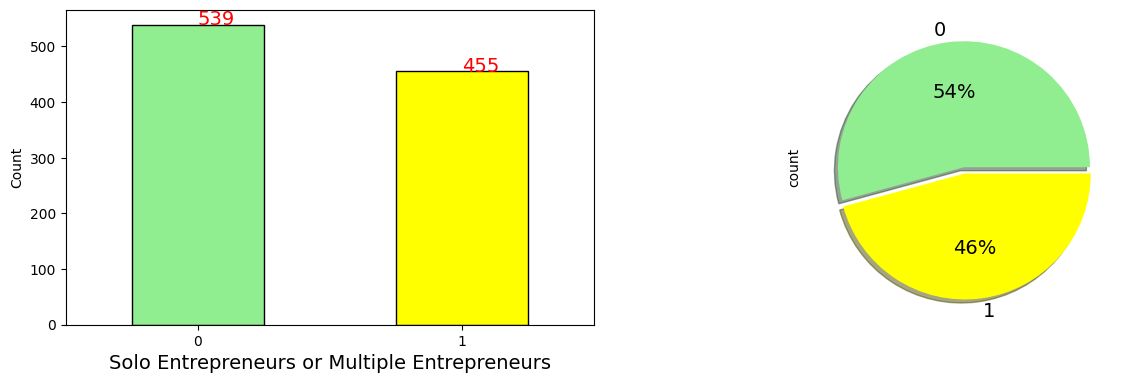

In [84]:
# Solo or multiple Entrepreneurs ?
print(shark_tank['Multiple Entrepreneurs'].value_counts(), "\n")
print(round(shark_tank['Multiple Entrepreneurs'].value_counts(normalize=True)*100).astype(str).str.replace('.0', '%', regex=False))

plt.figure(figsize = (15,9))
ax1 = plt.subplot(221)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='bar', color=["lightgreen","yellow"], ec="k")
plt.xlabel("Solo Entrepreneurs or Multiple Entrepreneurs", size=14)
plt.ylabel("Count")
plt.xticks(rotation=0)
for x,y in enumerate(shark_tank["Multiple Entrepreneurs"].value_counts()):
    plt.annotate(y, (x,y), fontsize=14, color="red")
    
ax2 = plt.subplot(222)
shark_tank["Multiple Entrepreneurs"].value_counts().plot(kind='pie', autopct='%.0f%%', explode = (0,0.05), colors=["lightgreen","yellow"], shadow=True, fontsize=14)

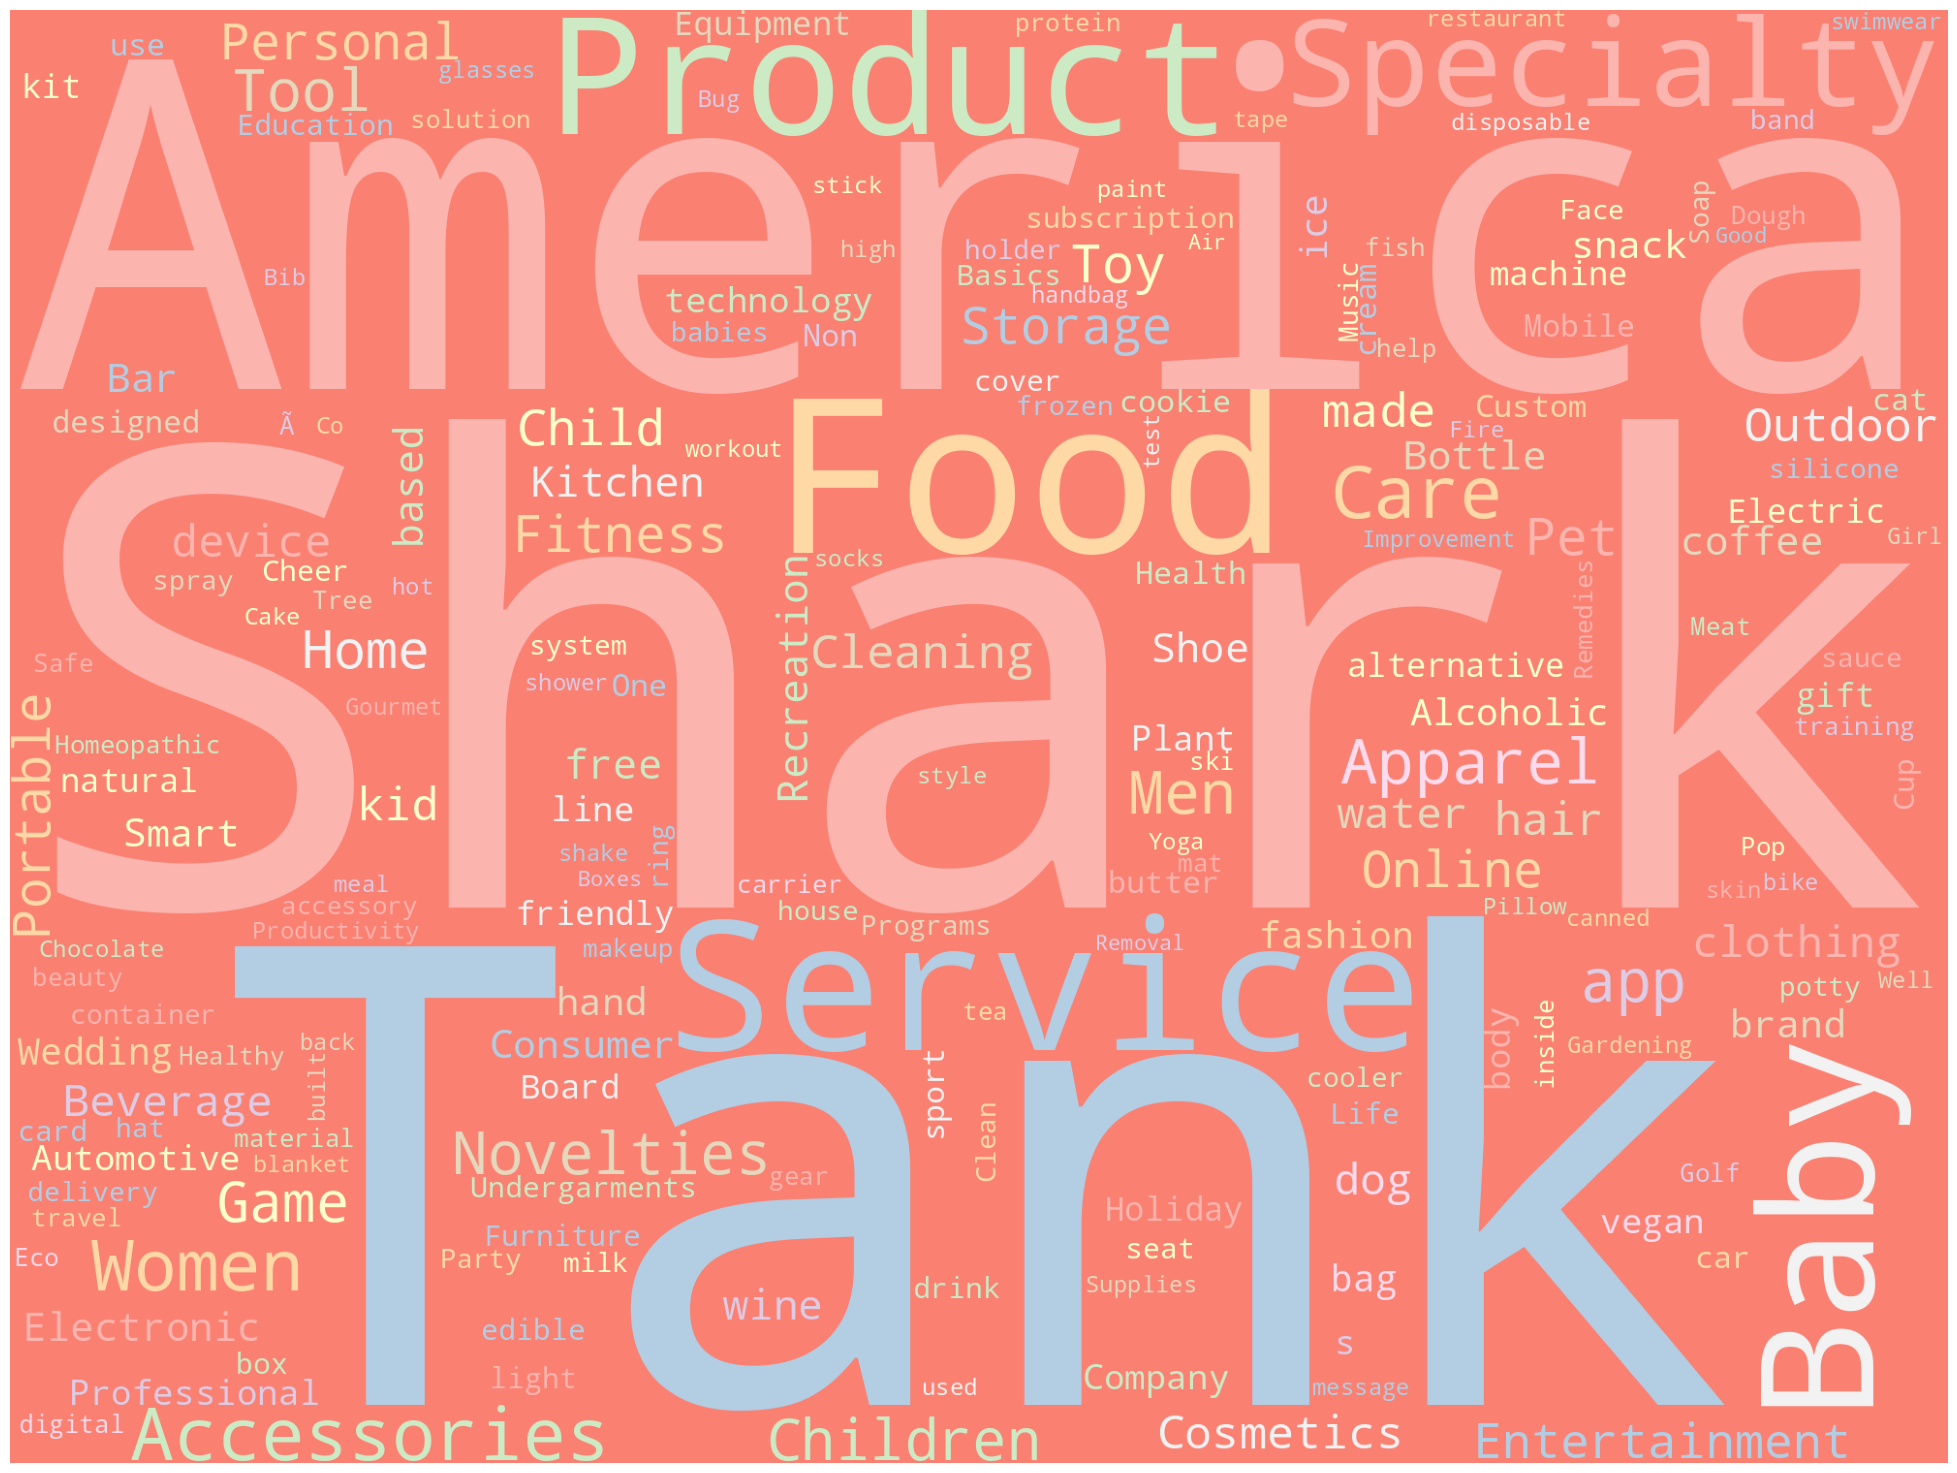

In [85]:
# Word cloud based on Business Description of startups came in all seasons
text = " Shark Tank America ".join(cat for cat in shark_tank.loc[shark_tank['Business Description'].notnull()]['Business Description'])
stop_words = list(STOPWORDS)
wordcloud = WordCloud(width=2000, height=1500, stopwords=stop_words, background_color='salmon', colormap='Pastel1', collocations=False, random_state=2025).generate(text)
plt.figure(figsize=(25,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [86]:
# Correlation matrix
shark_tank.corr(numeric_only=True).style.background_gradient(cmap = 'Blues')

In [87]:
print("numpy version: {}". format(np.__version__))
print("pandas version: {}". format(pd.__version__))
import matplotlib
print("matplotlib version: {}". format(matplotlib. __version__))
print("seaborn version: {}". format(sns.__version__))
import plotly
print("plotly version: {}". format(plotly.__version__))

# Current Python package versions
# numpy version: 1.26.4
# pandas version: 2.2.3
# matplotlib version: 3.7.5
# seaborn version: 0.12.2
# plotly version: 5.24.1

numpy version: 1.26.4
pandas version: 2.2.3
matplotlib version: 3.7.5
seaborn version: 0.12.2
plotly version: 5.24.1


## Data set values verification (you can ignore below section)
##### below queries should not return any rows

In [88]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Amount'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [89]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Total Deal Equity'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [90]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Deal Valuation'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [91]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Number of Sharks in Deal'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [92]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Investment Amount Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [93]:
shark_tank.loc[(shark_tank['Got Deal'] == 1) & (shark_tank['Equity Per Shark'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [94]:
shark_tank.loc[round(shark_tank['Total Deal Amount'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Amount'].fillna(0) + shark_tank['Mark Cuban Investment Amount'].fillna(0) + shark_tank['Lori Greiner Investment Amount'].fillna(0) + shark_tank['Robert Herjavec Investment Amount'].fillna(0) + shark_tank['Daymond John Investment Amount'].fillna(0) + shark_tank['Kevin O Leary Investment Amount'].fillna(0) + shark_tank['Guest Investment Amount'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [95]:
shark_tank.loc[round(shark_tank['Total Deal Equity'].fillna(0),1) != round(shark_tank['Barbara Corcoran Investment Equity'].fillna(0) + shark_tank['Mark Cuban Investment Equity'].fillna(0) + shark_tank['Lori Greiner Investment Equity'].fillna(0) + shark_tank['Robert Herjavec Investment Equity'].fillna(0) + shark_tank['Daymond John Investment Equity'].fillna(0) + shark_tank['Kevin O Leary Investment Equity'].fillna(0) + shark_tank['Guest Investment Equity'].fillna(0), 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [96]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].notnull()) & (shark_tank['Guest Name'].isnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [97]:
shark_tank.loc[(shark_tank['Guest Investment Amount'].isnull()) & (shark_tank['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [98]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] != 0) & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [99]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 0) & (shark_tank['Entrepreneur Names'].notnull() & shark_tank['Entrepreneur Names'].str.contains(' and'))]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [100]:
shark_tank.loc[(shark_tank['Multiple Entrepreneurs'] == 1) & (shark_tank['Entrepreneur Names'].str.contains(' and ')==False)]

Season Number   Startup Name  Episode Number  Pitch Number Season Start  \
1417             16  HistoryByMail              15          1418    18-Oct-24   

     Season End Original Air Date             Industry  \
1417        NaN          4-Apr-25  Media/Entertainment   

                               Business Description  \
1417  American history replica subscription service   

                 Company Website Pitchers Gender Pitchers Average Age  \
1417  https://historybymail.com/            Male               Middle   

     Pitchers City Pitchers State Entrepreneur Names  Multiple Entrepreneurs  \
1417           NaN            NaN         Ari Siegel                       1   

      US Viewership  Original Ask Amount  Original Offered Equity  \
1417            2.5             250000.0                     10.0   

      Valuation Requested  Got Deal  Total Deal Amount  Total Deal Equity  \
1417            2500000.0         1           250000.0               20.0   

      Deal Valuation  Number of Sharks in Deal  ...  Loan  \
1417       1250000.0                       2.0  ...   NaN   

      Deal Has Conditions Barbara Corcoran Investment Amount  \
1417                  NaN                           125000.0   

      Barbara Corcoran Investment Equity  Mark Cuban Investment Amount  \
1417                                10.0                           NaN   

     Mark Cuban Investment Equity  Lori Greiner Investment Amount  \
1417                          NaN                             NaN   

      Lori Greiner Investment Equity  Robert Herjavec Investment Amount  \
1417                             NaN                                NaN   

      Robert Herjavec Investment Equity  Daymond John Investment Amount  \
1417                                NaN                             NaN   

      Daymond John Investment Equity  Kevin O Leary Investment Amount  \
1417                             NaN                              NaN   

      Kevin O Leary Investment Equity  Guest Investment Amount  \
1417                              NaN                 125000.0   

      Guest Investment Equity       Guest Name  Barbara Corcoran Present  \
1417                     10.0  Daniel Lubetzky                       1.0   

      Mark Cuban Present  Lori Greiner Present Robert Herjavec Present  \
1417                 1.0                   1.0                     NaN   

      Daymond John Present  Kevin O Leary Present  Guest Present  \
1417                   NaN                    1.0            1.0   

      Total Deal Amount in Millions  
1417                           0.25  

[1 rows x 54 columns]

In [101]:
shark_tank.loc[(shark_tank['Got Deal'] != 0) & (shark_tank['Got Deal'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [102]:
shark_tank.loc[(shark_tank['Got Deal'] == 0) & (shark_tank['Total Deal Amount'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [103]:
shark_tank.loc[(shark_tank['Pitchers Gender'] == 'Mixed Team') & (shark_tank['Multiple Entrepreneurs'] != 1)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [104]:
shark_tank.loc[(shark_tank['Got Deal'] == 0) & (shark_tank['Guest Name'].notnull())]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [105]:
shark_tank.loc[shark_tank['Total Deal Amount'] < shark_tank["Loan"]]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]

In [106]:
shark_tank.loc[(shark_tank['Pitchers State'] != 'Non-US') & (shark_tank['Pitchers State'].str.len()>2)]

Empty DataFrame
Columns: [Season Number, Startup Name, Episode Number, Pitch Number, Season Start, Season End, Original Air Date, Industry, Business Description, Company Website, Pitchers Gender, Pitchers Average Age, Pitchers City, Pitchers State, Entrepreneur Names, Multiple Entrepreneurs, US Viewership, Original Ask Amount, Original Offered Equity, Valuation Requested, Got Deal, Total Deal Amount, Total Deal Equity, Deal Valuation, Number of Sharks in Deal, Investment Amount Per Shark, Equity Per Shark, Royalty Deal, Advisory Shares Equity, Loan, Deal Has Conditions, Barbara Corcoran Investment Amount, Barbara Corcoran Investment Equity, Mark Cuban Investment Amount, Mark Cuban Investment Equity, Lori Greiner Investment Amount, Lori Greiner Investment Equity, Robert Herjavec Investment Amount, Robert Herjavec Investment Equity, Daymond John Investment Amount, Daymond John Investment Equity, Kevin O Leary Investment Amount, Kevin O Leary Investment Equity, Guest Investment Amount, Guest Investment Equity, Guest Name, Barbara Corcoran Present, Mark Cuban Present, Lori Greiner Present, Robert Herjavec Present, Daymond John Present, Kevin O Leary Present, Guest Present, Total Deal Amount in Millions]
Index: []

[0 rows x 54 columns]